In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

# Synchronization by Increase of Noise Strength $\sigma^2$

## Three Selected Examples

In [2]:
params = {
  "runtime": 1000.0,

  "J_itoi": 5.0,
  "J_etoe": 0.6,
  "J_etoi": 3.2,
  "J_itoe": 7.0,
    
  "J_ppee": 0.6,
  "J_ppei": 0.6,

  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 10.0,
  "poisson_p": 0.6,
  "poisson_size": 800,
  "poisson_mean_input": 600,

   "const_delay": 0.2,
   "N_pop": 2
}

### Low Noise Strength -> No Synchronization

In [8]:
params_mid = dict(params)
params_mid["poisson_variance"] = 1.0

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 360000.0 - single neuron 450.0
Poisson strength: 0.0016666666666666668
Net 2 - rate for single neuron 270.0
Initialization time: 0.48328280448913574s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
==== Network Run Finished ====
runtime: 12.0


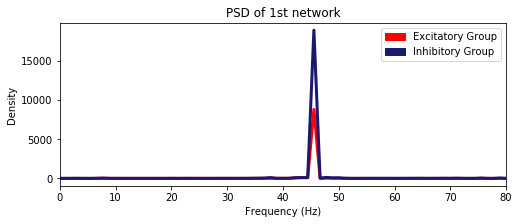

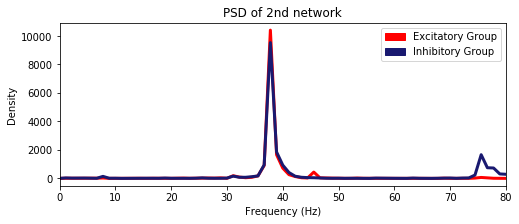

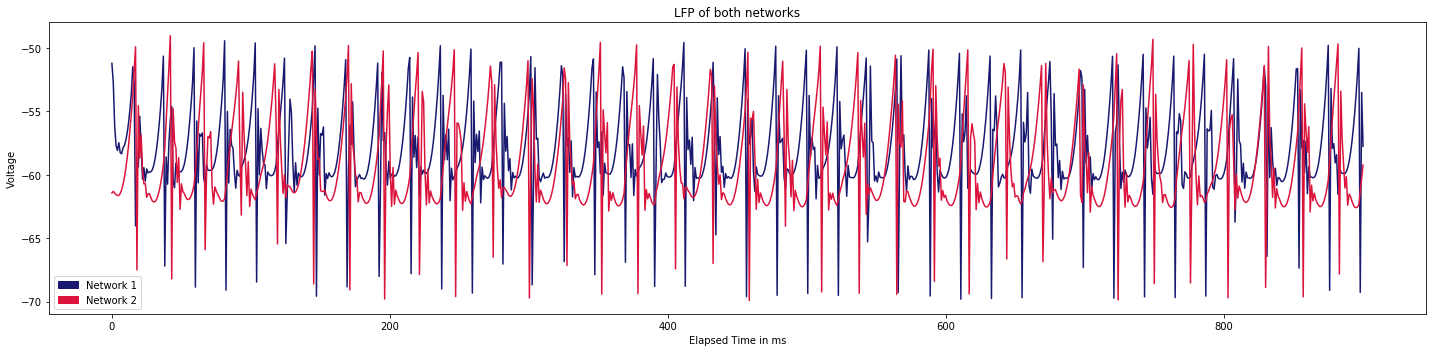

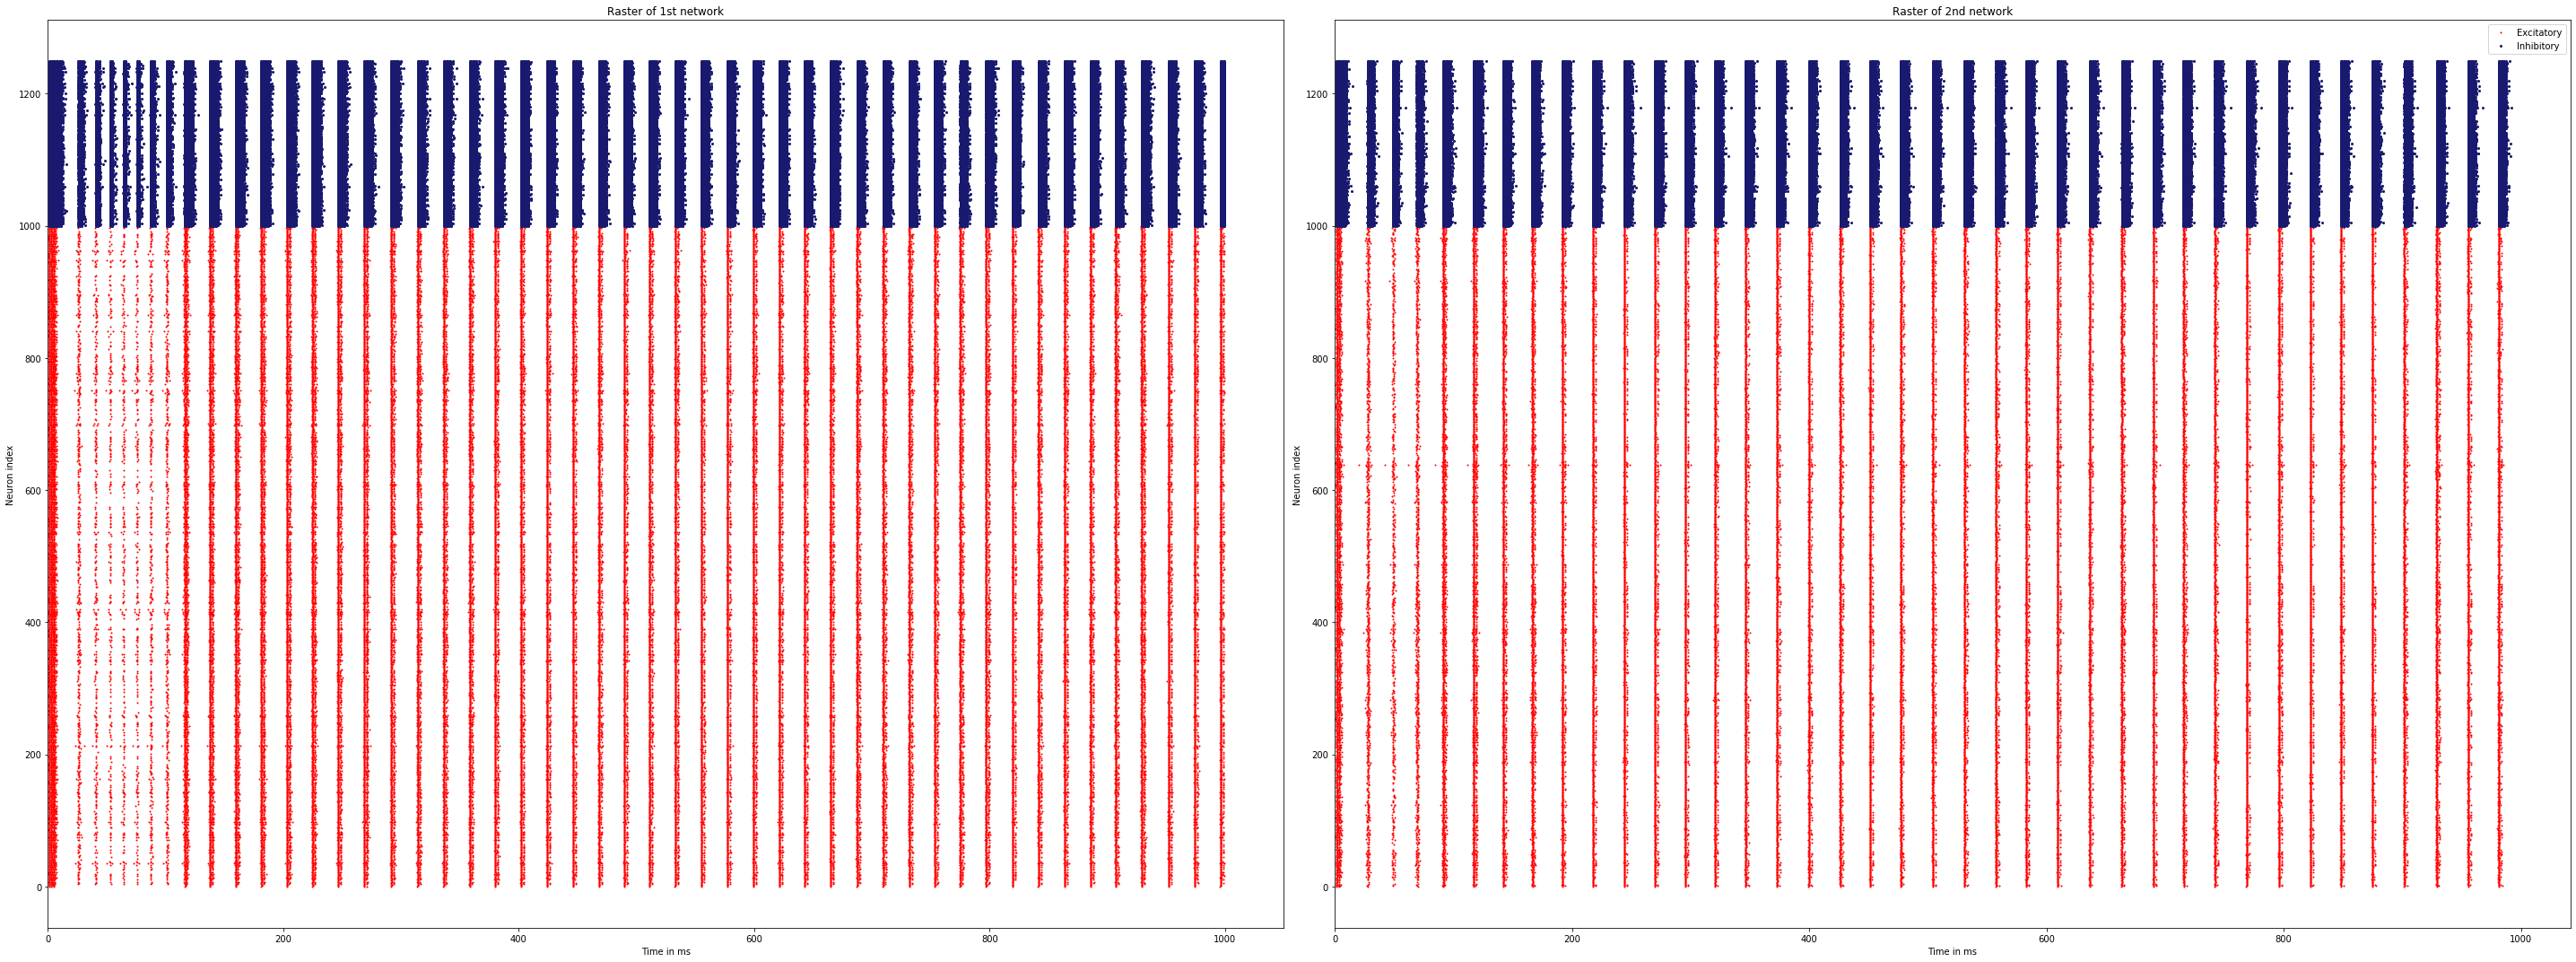

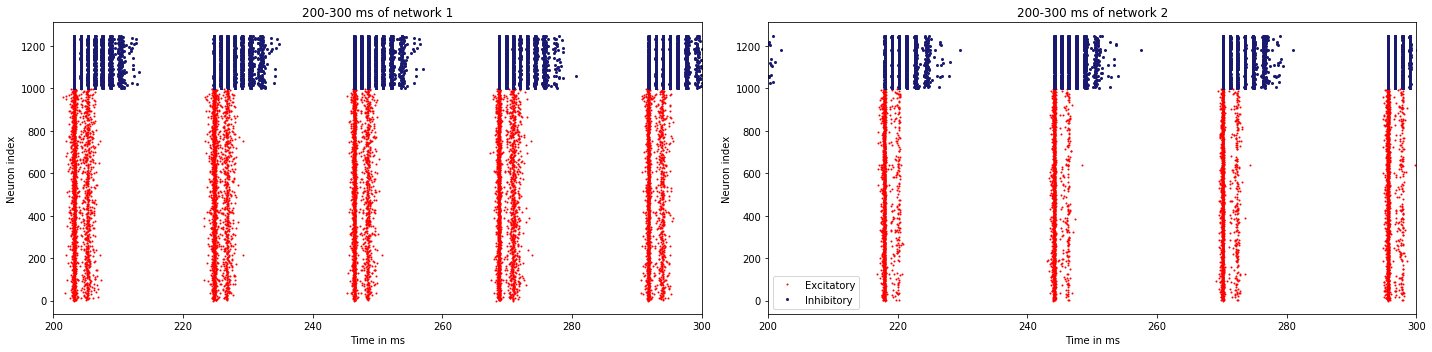

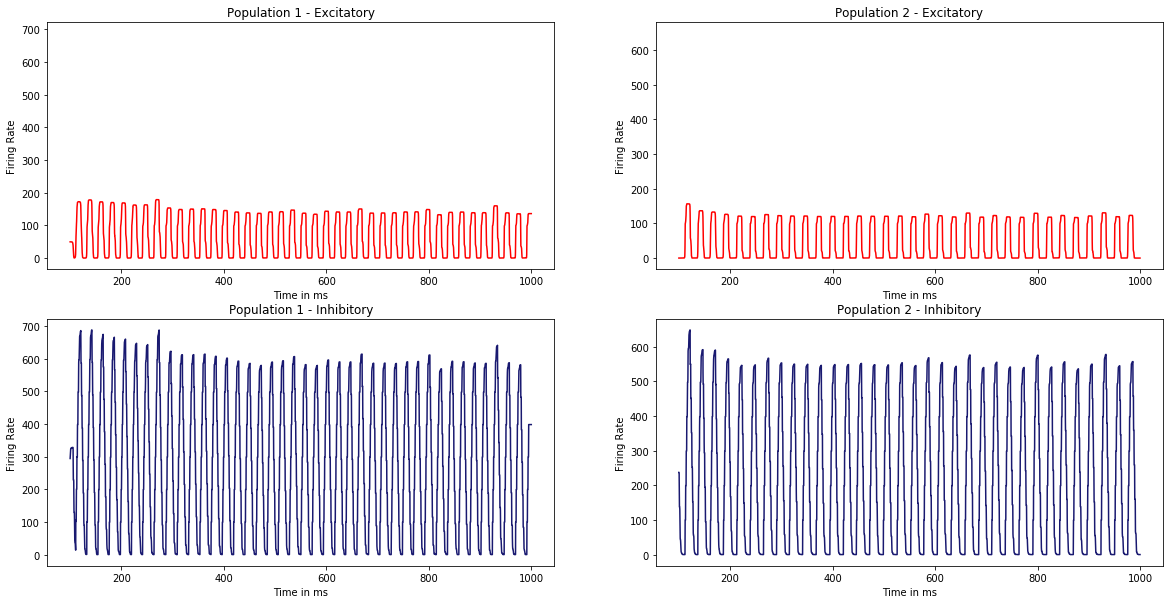

In [9]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80, full_raster=True)

### Mid Noise Strength

In [10]:
params_mid = dict(params)
params_mid["poisson_variance"] = 7.0

mid_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 51428.57142857143 - single neuron 64.28571428571428
Poisson strength: 0.011666666666666667
Net 2 - rate for single neuron 38.57142857142856
Initialization time: 0.4639720916748047s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
==== Network Run Finished ====
runtime: 12.0


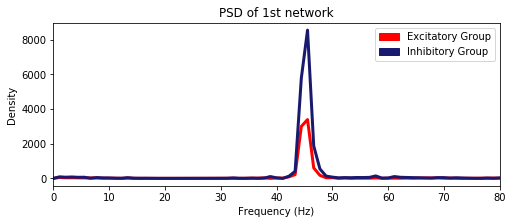

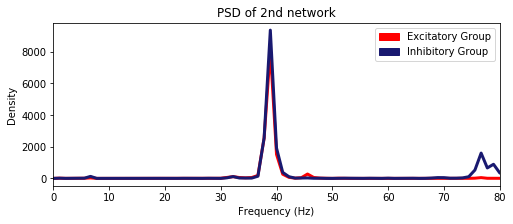

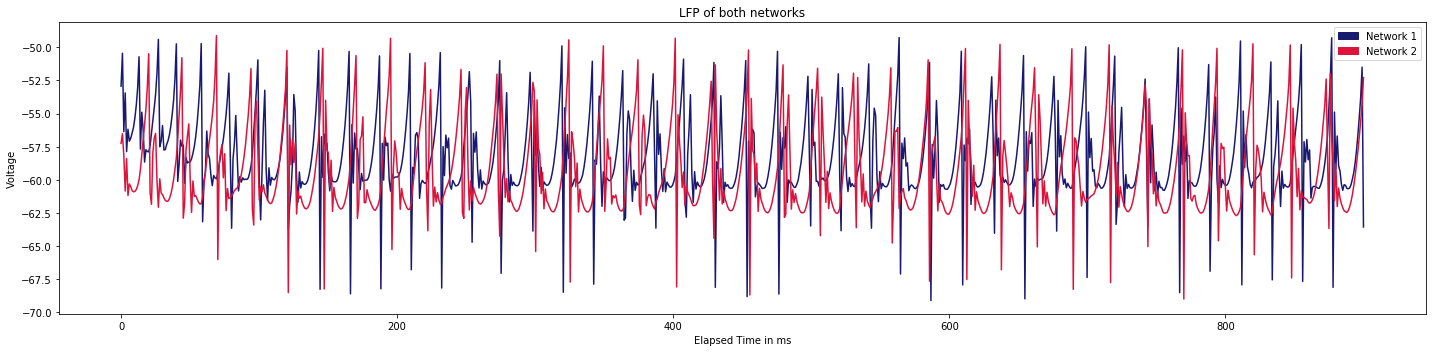

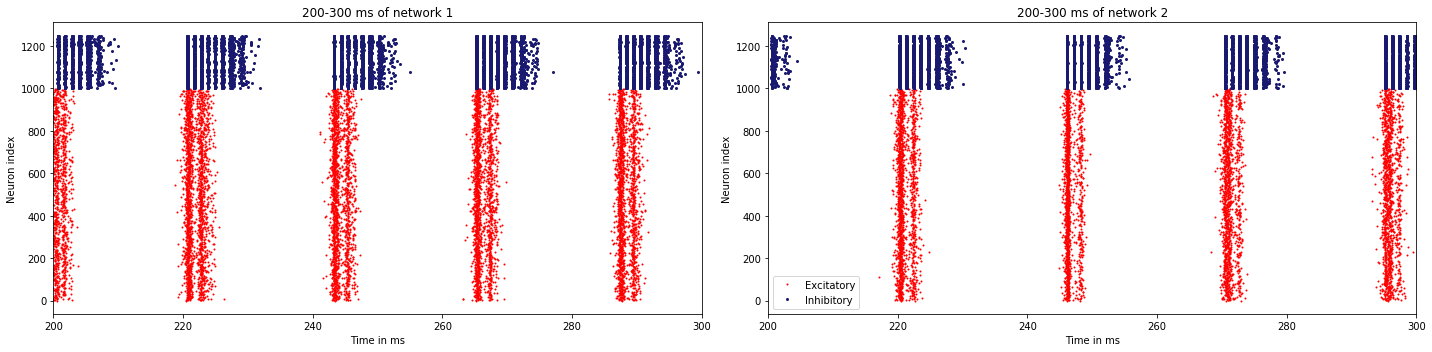

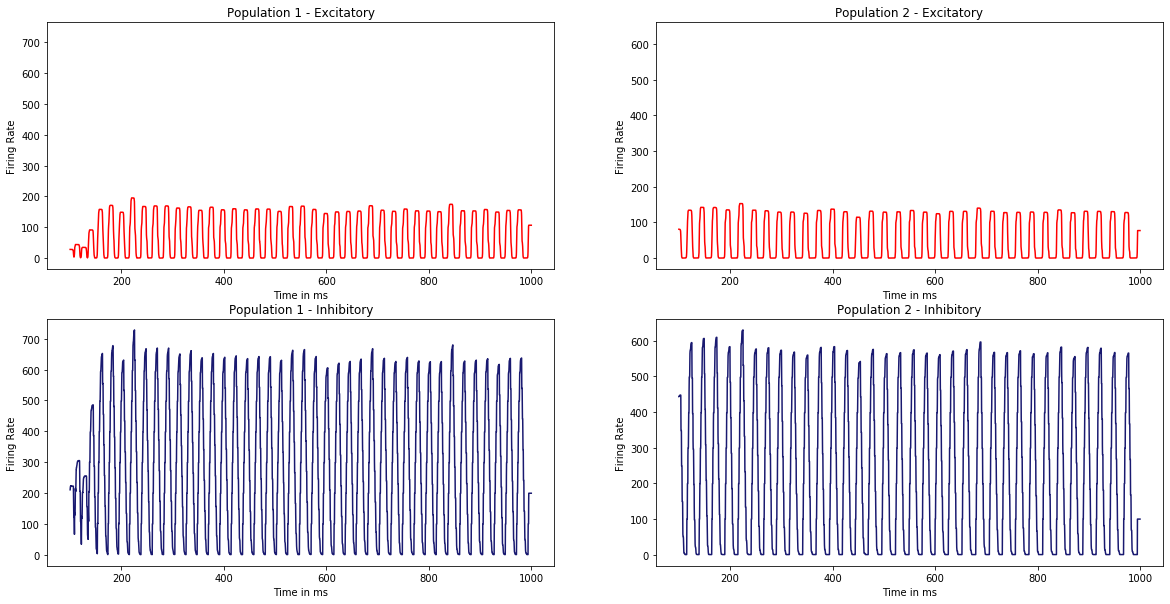

In [11]:
plots.plot_results(mid_strength, pop_rates=True, xlim_psd=80)

### High Noise Strength -> Synchronized

In [6]:
params_mid = dict(params)
params_mid["poisson_variance"] = 13.0

high_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
Poisson strength: 0.021666666666666667
Net 2 - rate for single neuron 20.769230769230766
Initialization time: 0.4832921028137207s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 7s
==== Network Run Finished ====
runtime: 10.7


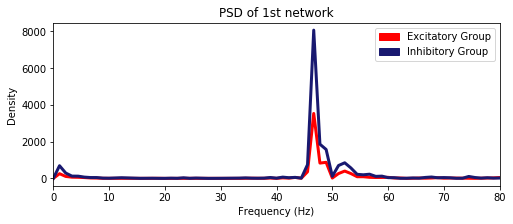

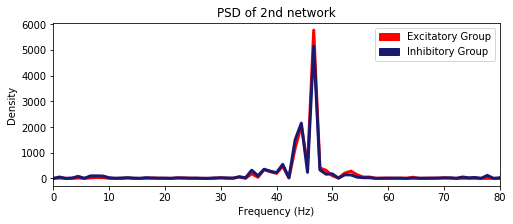

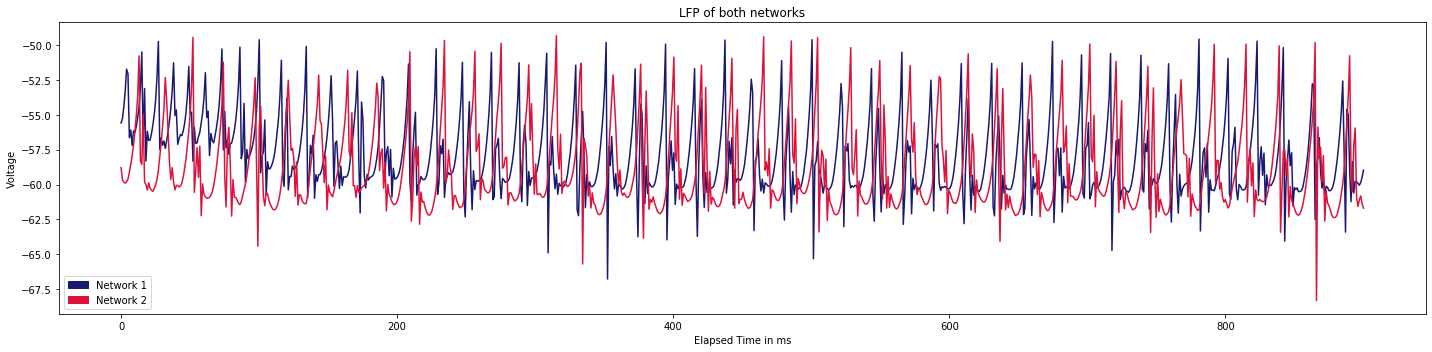

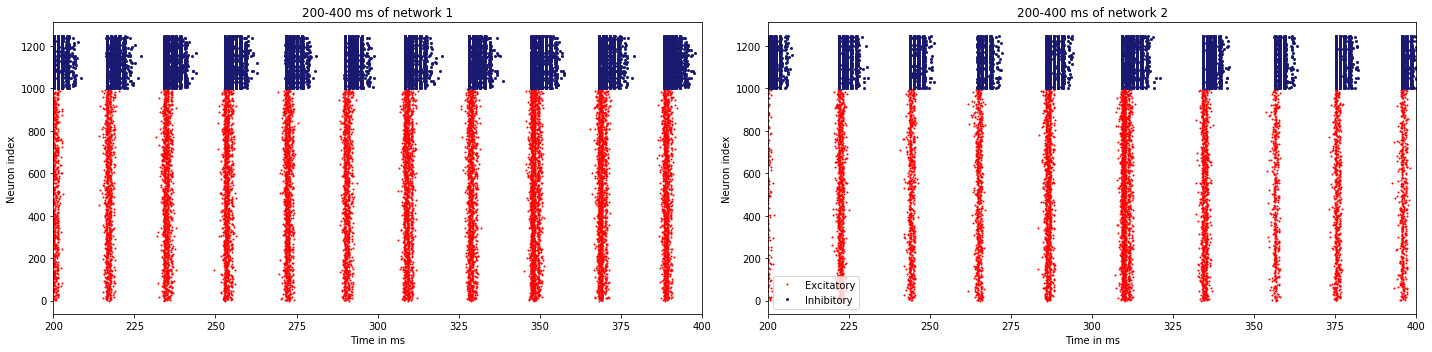

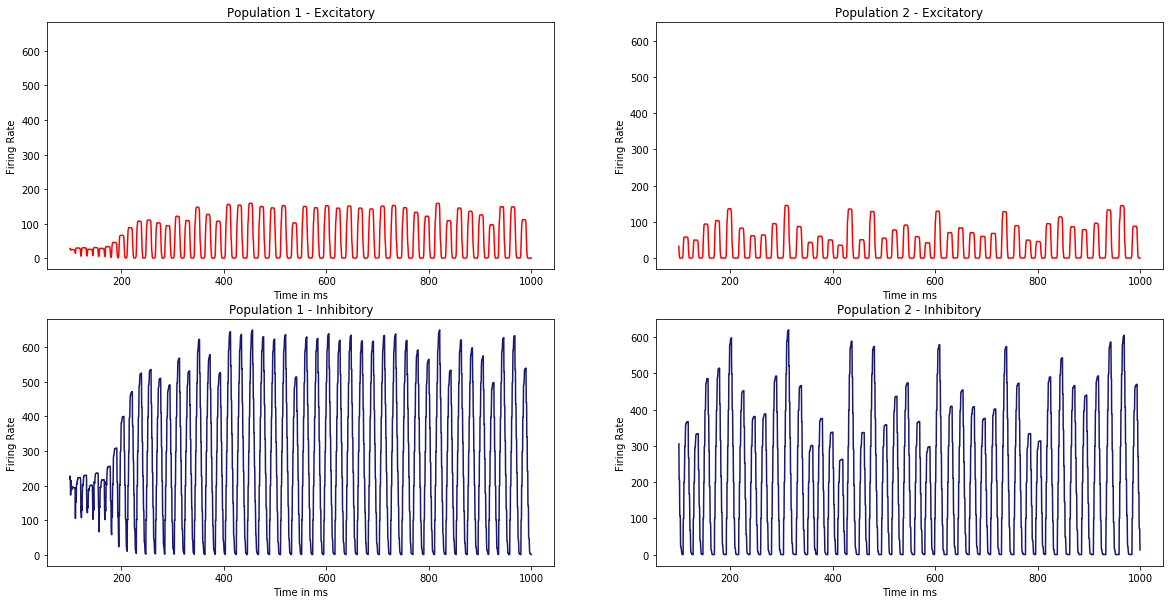

In [7]:
plots.plot_results(high_strength, pop_rates=True, xlim_psd=80, excerpt_x_left=200, excerpt_x_right=400)

## Exploration over noise ratio p and noise strength $\sigma^2$

In [10]:
exp_params = {
  "poisson_variance": np.arange(1.0, 20.0, 0.5),
  "poisson_p": np.arange(0.5, 1.0, .1),
}

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=params,
    hdf_filename=constants.MODELS_PATH + "/uncorrelated_noise_sigma.h5",
    exploration_name="uncorrelated_noise_new_10"
)

In [11]:
ex.run()

2020-07-02 16:53:29,527	INFO resource_spec.py:212 -- Starting Ray with 10.3 GiB memory available for workers and up to 5.16 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-02 16:53:29,893	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/190 [00:00<?, ?it/s]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=11061) Poisson strength: 0.0016666666666666668
(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 360000.0 - single neuron 450.0
(pid=11065) Poisson strength: 0.0016666666666666668
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 240000.0 - single neuron 300.0
(pid=11067) Poisson strength: 0.0025
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 240000.0 - single neuron 300.0
(pid=11068) Poisson strength: 0.0025
(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 240000.0 - single neuron 300.0
(pid=11063) Poisson strength: 0.0025
(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 240000.0 - single neuron 300.0
(pid=11062) Poisson strength: 0.0025
(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 240000.0 - single neuron 300.0
(pid=11064) Poisson strength: 0.0025
(pid=11060) Initializing net ...

  1%|          | 1/190 [00:53<2:48:35, 53.52s/it]

(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 144000.0 - single neuron 180.0
(pid=11062) Poisson strength: 0.004166666666666667
(pid=11061) Net 2 - rate for single neuron 90.0
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 144000.0 - single neuron 180.0
(pid=11059) Poisson strength: 0.004166666666666667


  2%|▏         | 3/190 [00:54<1:22:07, 26.35s/it]

(pid=11065) Initialization time: 1.4245309829711914s
(pid=11062) Net 2 - rate for single neuron 108.0
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 144000.0 - single neuron 180.0
(pid=11067) Poisson strength: 0.004166666666666667
(pid=11059) Net 2 - rate for single neuron 125.99999999999999
(pid=11065) ==== Running Network ... ====
(pid=11067) Net 2 - rate for single neuron 144.0
(pid=11061) Initialization time: 1.6058082580566406s
(pid=11061) ==== Running Network ... ====
(pid=11062) Initialization time: 1.4420249462127686s
(pid=11062) ==== Running Network ... ====
(pid=11059) Initialization time: 1.5266199111938477s
(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 144000.0 - single neuron 180.0
(pid=11064) Poisson strength: 0.004166666666666667
(pid=11059) ==== Running Network ... ====
(pid=11067) Initialization time: 1.412642240524292s
(pid=11067) ==== Running Network ... ====
(pid=11064) Net 2 - rate for single neuron 161.99999999999997
(pid=110

  3%|▎         | 5/190 [00:57<41:52, 13.58s/it]  

(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=11066) Poisson strength: 0.005
(pid=11069) Initialization time: 1.4396591186523438s
(pid=11069) ==== Running Network ... ====
(pid=11066) Net 2 - rate for single neuron 90.0


  3%|▎         | 6/190 [00:58<30:21,  9.90s/it]

(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11066) Initialization time: 1.2698240280151367s
(pid=11066) ==== Running Network ... ====


  4%|▎         | 7/190 [00:58<21:17,  6.98s/it]

(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=11068) Poisson strength: 0.005
(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 120000.0 - single neuron 150.0
(pid=11063) Poisson strength: 0.005


  4%|▍         | 8/190 [00:58<15:01,  4.95s/it]

(pid=11065) Starting simulation at t=0. s for a duration of 1. s


  5%|▍         | 9/190 [00:59<10:37,  3.52s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 180000.0 - single neuron 225.0
(pid=11073) Poisson strength: 0.0033333333333333335
(pid=11068) Net 2 - rate for single neuron 105.0
(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 180000.0 - single neuron 225.0
(pid=11074) Poisson strength: 0.0033333333333333335
(pid=11063) Net 2 - rate for single neuron 119.99999999999999
(pid=11061) Starting simulation at t=0. s for a duration of 1. s


  6%|▋         | 12/190 [00:59<03:58,  1.34s/it]

(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) Net 2 - rate for single neuron 157.5
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) Net 2 - rate for single neuron 179.99999999999997
(pid=11068) Initialization time: 1.5062451362609863s
(pid=11063) Initialization time: 1.5305700302124023s
(pid=11068) ==== Running Network ... ====
(pid=11063) ==== Running Network ... ====
(pid=11073) Initialization time: 1.6972599029541016s
(pid=11074) Initialization time: 1.6899187564849854s
(pid=11073) ==== Running Network ... ====
(pid=11074) ==== Running Network ... ====
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) 0.3814 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11067) 0.38335 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11069) 0.38365 s (38%) simulated in 10

  7%|▋         | 13/190 [02:06<1:02:01, 21.03s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 90000.0 - single neuron 112.5
(pid=11073) Poisson strength: 0.006666666666666667
(pid=11073) Net 2 - rate for single neuron 101.24999999999999
(pid=11063) 0.33605 s (33%) simulated in 10s, estimated 20s remaining.
(pid=11068) 0.337 s (33%) simulated in 10s, estimated 20s remaining.
(pid=11073) Initialization time: 1.6442482471466064s
(pid=11073) ==== Running Network ... ====
(pid=11064) 0.34505 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11069) 0.6432 s (64%) simulated in 20s, estimated 11s remaining.
(pid=11062) 0.9255 s (92%) simulated in 30s, estimated 2s remaining.
(pid=11067) 0.9119 s (91%) simulated in 30s, estimated 3s remaining.
(pid=11059) 0.6626 s (66%) simulated in 20s, estimated 10s remaining.


  8%|▊         | 15/190 [02:11<32:56, 11.29s/it]  

(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 80000.0 - single neuron 100.0
(pid=11074) Poisson strength: 0.0075


  9%|▉         | 18/190 [02:11<11:29,  4.01s/it]

(pid=11074) Net 2 - rate for single neuron 50.0


 12%|█▏        | 22/190 [02:12<03:20,  1.19s/it]

(pid=11062) 1. s (100%) simulated in 32s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 34.5
(pid=11074) Initialization time: 1.756511926651001s
(pid=11074) ==== Running Network ... ====


 13%|█▎        | 24/190 [02:13<01:54,  1.45it/s]

(pid=11067) 1. s (100%) simulated in 32s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 34.9
(pid=11073) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) 0.932 s (93%) simulated in 30s, estimated 2s remaining.
(pid=11061) 0.9507 s (95%) simulated in 30s, estimated 2s remaining.
(pid=11066) 0.952 s (95%) simulated in 30s, estimated 2s remaining.
(pid=11065) 1. s (100%) simulated in 31s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 33.4
(pid=11061) 1. s (100%) simulated in 31s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 33.0
(pid=11066) 1. s (100%) simulated in 31s
(pid=11066) ==== Network Run Finished ====
(pid=11066) runtime: 33.0
(pid=11063) 0.69535 s (69%) simulated in 20s, estimated 9s remaining.
(pid=11068) 0.6962 s (69%) simulated in 20s, estimated 9s remaining.


 13%|█▎        | 25/190 [02:18<05:29,  2.00s/it]

(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 80000.0 - single neuron 100.0
(pid=11062) Poisson strength: 0.0075
(pid=11064) 0.71215 s (71%) simulated in 20s, estimated 8s remaining.
(pid=11069) 1. s (100%) simulated in 29s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 37.2


 14%|█▎        | 26/190 [02:18<04:09,  1.52s/it]

(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 80000.0 - single neuron 100.0
(pid=11067) Poisson strength: 0.0075
(pid=11062) Net 2 - rate for single neuron 60.0
(pid=11067) Net 2 - rate for single neuron 70.0
(pid=11062) Initialization time: 1.550873041152954s
(pid=11062) ==== Running Network ... ====
(pid=11059) 1. s (100%) simulated in 29s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 36.6
(pid=11067) Initialization time: 1.551753044128418s
(pid=11067) ==== Running Network ... ====
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 80000.0 - single neuron 100.0
(pid=11065) Poisson strength: 0.0075
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Net 2 - rate for single neuron 80.0
(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 80000.0 - single neuron 100.0
(

 15%|█▍        | 28/190 [02:24<05:05,  1.89s/it]

(pid=11066) ==== Running Network ... ====
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=11069) Poisson strength: 0.008333333333333333


 15%|█▌        | 29/190 [02:24<03:40,  1.37s/it]

(pid=11069) Net 2 - rate for single neuron 54.0


 16%|█▋        | 31/190 [02:25<02:40,  1.01s/it]

(pid=11069) Initialization time: 1.4943222999572754s
(pid=11069) ==== Running Network ... ====
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=11059) Poisson strength: 0.008333333333333333
(pid=11064) 1. s (100%) simulated in 27s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 38.0
(pid=11063) 1. s (100%) simulated in 28s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 34.0
(pid=11059) Net 2 - rate for single neuron 62.99999999999999
(pid=11068) 1. s (100%) simulated in 28s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 34.8
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) Initialization time: 1.5684590339660645s
(pid=11059) ==== Running Network ... ====
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) 0.3655 s (36%) simulated in 10s, estimated 17s remaining.
(pid=110

 17%|█▋        | 32/190 [02:31<06:38,  2.52s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=11064) Poisson strength: 0.008333333333333333


 18%|█▊        | 34/190 [02:32<03:37,  1.39s/it]

(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 72000.0 - single neuron 90.0
(pid=11063) Poisson strength: 0.008333333333333333
(pid=11064) Net 2 - rate for single neuron 72.0
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 65454.545454545456 - single neuron 81.81818181818181
(pid=11068) Poisson strength: 0.009166666666666667
(pid=11063) Net 2 - rate for single neuron 80.99999999999999
(pid=11068) Net 2 - rate for single neuron 40.90909090909091
(pid=11064) Initialization time: 1.679037094116211s
(pid=11073) 0.7362 s (73%) simulated in 20s, estimated 7s remaining.
(pid=11064) ==== Running Network ... ====
(pid=11065) 0.3482 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11063) Initialization time: 1.6602962017059326s
(pid=11068) Initialization time: 1.6734728813171387s
(pid=11063) ==== Running Network ... ====
(pid=11068) ==== Running Network ... ====
(pid=11069) 0.3416 s (34%)

 18%|█▊        | 35/190 [02:49<15:13,  5.90s/it]

(pid=11059) 0.63975 s (63%) simulated in 20s, estimated 11s remaining.
(pid=11066) 0.6325 s (63%) simulated in 20s, estimated 12s remaining.
(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 65454.545454545456 - single neuron 81.81818181818181
(pid=11073) Poisson strength: 0.009166666666666667
(pid=11064) 303.85 ms (30%) simulated in 10s, estimated 23s remaining.
(pid=11073) Net 2 - rate for single neuron 49.090909090909086
(pid=11063) 305.85 ms (30%) simulated in 10s, estimated 23s remaining.
(pid=11073) Initialization time: 1.6812536716461182s
(pid=11073) ==== Running Network ... ====
(pid=11062) 0.98905 s (98%) simulated in 30s, estimated < 1s remaining.
(pid=11074) 1. s (100%) simulated in 29s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 38.4
(pid=11062) 1. s (100%) simulated in 30s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 31.5
(pid=11067) 0.99275 s (99%) simulated in 30s, estimated < 1s remaining.
(pid=11067) 1. s (100%) si

 19%|█▉        | 36/190 [02:58<18:10,  7.08s/it]

(pid=11059) 0.93865 s (93%) simulated in 30s, estimated 2s remaining.
(pid=11069) 1. s (100%) simulated in 31s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 33.0


 19%|█▉        | 37/190 [02:59<12:57,  5.08s/it]

(pid=11066) 0.92945 s (92%) simulated in 30s, estimated 2s remaining.
(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 65454.545454545456 - single neuron 81.81818181818181
(pid=11062) Poisson strength: 0.009166666666666667
(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 65454.545454545456 - single neuron 81.81818181818181
(pid=11074) Poisson strength: 0.009166666666666667
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 65454.545454545456 - single neuron 81.81818181818181
(pid=11067) Poisson strength: 0.009166666666666667


 20%|██        | 38/190 [02:59<09:16,  3.66s/it]

(pid=11064) 0.59405 s (59%) simulated in 20s, estimated 14s remaining.
(pid=11062) Net 2 - rate for single neuron 65.45454545454544
(pid=11063) 0.5883 s (58%) simulated in 20s, estimated 14s remaining.
(pid=11074) Net 2 - rate for single neuron 57.272727272727266
(pid=11067) Net 2 - rate for single neuron 73.63636363636363
(pid=11062) Initialization time: 2.126615047454834s
(pid=11059) 1. s (100%) simulated in 32s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 33.7
(pid=11074) Initialization time: 2.1352052688598633s
(pid=11062) ==== Running Network ... ====
(pid=11067) Initialization time: 2.1132261753082275s
(pid=11074) ==== Running Network ... ====
(pid=11067) ==== Running Network ... ====
(pid=11066) 1. s (100%) simulated in 32s
(pid=11066) ==== Network Run Finished ====
(pid=11066) runtime: 37.8
(pid=11061) 0.8887 s (88%) simulated in 30s, estimated 4s remaining.


 21%|██        | 39/190 [03:03<09:04,  3.60s/it]

(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 60000.0 - single neuron 75.0
(pid=11065) Poisson strength: 0.01
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Net 2 - rate for single neuron 37.5
(pid=11068) 0.57795 s (57%) simulated in 20s, estimated 15s remaining.
(pid=11065) Initialization time: 2.08764386177063s
(pid=11065) ==== Running Network ... ====
(pid=11073) 255.4 ms (25%) simulated in 10s, estimated 29s remaining.
(pid=11061) 1. s (100%) simulated in 34s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 43.5
(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 60000.0 - single neuron 75.0
(pid=11069) Poisson strength: 0.01
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) Net 2 - rate for single neuron 45.0
(pid=11074) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) Initialization time: 2.08982

 21%|██        | 40/190 [03:13<14:18,  5.72s/it]

(pid=11064) 1. s (100%) simulated in 34s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 39.9


 22%|██▏       | 42/190 [03:14<07:10,  2.91s/it]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 60000.0 - single neuron 75.0
(pid=11061) Poisson strength: 0.01


 23%|██▎       | 43/190 [03:14<05:09,  2.11s/it]

(pid=11063) 1. s (100%) simulated in 34s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 40.1
(pid=11061) Net 2 - rate for single neuron 67.5
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) 0.88725 s (88%) simulated in 30s, estimated 4s remaining.
(pid=11061) Initialization time: 1.8063528537750244s
(pid=11061) ==== Running Network ... ====
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) 0.5685 s (56%) simulated in 20s, estimated 15s remaining.
(pid=11065) 0.319 s (31%) simulated in 10s, estimated 21s remaining.
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 0.31995 s (31%) simulated in 10s, estimated 21s remaining.
(pid=11068) 1. s (100%) simulated in 33s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 44.0


 23%|██▎       | 44/190 [03:20<08:03,  3.31s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 55384.61538461538 - single neuron 69.23076923076923
(pid=11064) Poisson strength: 0.010833333333333334


 24%|██▎       | 45/190 [03:21<06:04,  2.51s/it]

(pid=11064) Net 2 - rate for single neuron 34.61538461538461
(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 55384.61538461538 - single neuron 69.23076923076923
(pid=11063) Poisson strength: 0.010833333333333334
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) Net 2 - rate for single neuron 41.53846153846153
(pid=11064) Initialization time: 1.7895963191986084s
(pid=11064) ==== Running Network ... ====
(pid=11062) 0.5985 s (59%) simulated in 20s, estimated 13s remaining.
(pid=11063) Initialization time: 1.7248389720916748s
(pid=11063) ==== Running Network ... ====
(pid=11067) 0.6057 s (60%) simulated in 20s, estimated 13s remaining.
(pid=11069) 0.32245 s (32%) simulated in 10s, estimated 21s remaining.


 24%|██▍       | 46/190 [03:25<07:04,  2.95s/it]

(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 55384.61538461538 - single neuron 69.23076923076923
(pid=11068) Poisson strength: 0.010833333333333334
(pid=11068) Net 2 - rate for single neuron 48.46153846153845
(pid=11059) 0.3241 s (32%) simulated in 10s, estimated 21s remaining.
(pid=11068) Initialization time: 1.6300089359283447s
(pid=11073) 0.89505 s (89%) simulated in 30s, estimated 4s remaining.
(pid=11068) ==== Running Network ... ====
(pid=11065) 0.6479 s (64%) simulated in 20s, estimated 11s remaining.
(pid=11066) 0.32545 s (32%) simulated in 10s, estimated 21s remaining.
(pid=11074) 0.6473 s (64%) simulated in 20s, estimated 11s remaining.
(pid=11073) 1. s (100%) simulated in 33s
(pid=11073) ==== Network Run Finished ====
(pid=11073) runtime: 39.1
(pid=11061) 0.33095 s (33%) simulated in 10s, estimated 20s remaining.
(pid=11063) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) 0

 25%|██▍       | 47/190 [03:36<13:08,  5.52s/it]

(pid=11059) 0.65105 s (65%) simulated in 20s, estimated 11s remaining.
(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 55384.61538461538 - single neuron 69.23076923076923
(pid=11073) Poisson strength: 0.010833333333333334
(pid=11065) 0.97865 s (97%) simulated in 30s, estimated 1s remaining.
(pid=11066) 0.65195 s (65%) simulated in 20s, estimated 11s remaining.
(pid=11073) Net 2 - rate for single neuron 55.38461538461538
(pid=11065) 1. s (100%) simulated in 30s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 32.2
(pid=11074) 0.97335 s (97%) simulated in 30s, estimated 1s remaining.
(pid=11073) Initialization time: 1.5675699710845947s
(pid=11073) ==== Running Network ... ====
(pid=11074) 1. s (100%) simulated in 30s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 37.5
(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 55384.61538461538 - single neuron 69.23076923076923
(pid=11062) Poisson strength: 0.010833333333333334
(pid

 26%|██▋       | 50/190 [03:45<07:23,  3.17s/it]

(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 51428.57142857143 - single neuron 64.28571428571428
(pid=11074) Poisson strength: 0.011666666666666667
(pid=11065) Initialization time: 1.5410161018371582s


 27%|██▋       | 51/190 [03:45<05:16,  2.28s/it]

(pid=11065) ==== Running Network ... ====
(pid=11074) Net 2 - rate for single neuron 44.99999999999999
(pid=11059) 1. s (100%) simulated in 29s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 35.1
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) Initialization time: 1.5541369915008545s
(pid=11074) ==== Running Network ... ====
(pid=11066) 1. s (100%) simulated in 29s
(pid=11066) ==== Network Run Finished ====
(pid=11066) runtime: 35.1


 27%|██▋       | 52/190 [03:50<06:56,  3.02s/it]

(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 51428.57142857143 - single neuron 64.28571428571428
(pid=11069) Poisson strength: 0.011666666666666667
(pid=11061) 1. s (100%) simulated in 28s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 34.5
(pid=11069) Net 2 - rate for single neuron 51.428571428571416
(pid=11074) Starting simulation at t=0. s for a duration of 1. s


 28%|██▊       | 53/190 [03:51<05:59,  2.63s/it]

(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) Initialization time: 1.5291740894317627s
(pid=11069) ==== Running Network ... ====
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 51428.57142857143 - single neuron 64.28571428571428
(pid=11059) Poisson strength: 0.011666666666666667


 28%|██▊       | 54/190 [03:52<04:44,  2.09s/it]

(pid=11059) Net 2 - rate for single neuron 57.85714285714285
(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 48000.0 - single neuron 60.0
(pid=11066) Poisson strength: 0.0125
(pid=11063) 0.732 s (73%) simulated in 20s, estimated 7s remaining.
(pid=11068) 0.72925 s (72%) simulated in 20s, estimated 7s remaining.
(pid=11066) Net 2 - rate for single neuron 30.0
(pid=11064) 0.74905 s (74%) simulated in 20s, estimated 7s remaining.
(pid=11059) Initialization time: 1.4633142948150635s
(pid=11059) ==== Running Network ... ====
(pid=11073) 0.37645 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11066) Initialization time: 1.428412914276123s
(pid=11066) ==== Running Network ... ====
(pid=11067) 0.37915 s (37%) simulated in 10s, estimated 16s remaining.
(pid=11059) Starting simulation at t=0. s for a duration of 1. s


 29%|██▉       | 55/190 [03:55<05:34,  2.48s/it]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 48000.0 - single neuron 60.0
(pid=11061) Poisson strength: 0.0125
(pid=11065) 0.3873 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11061) Net 2 - rate for single neuron 36.0
(pid=11061) Initialization time: 1.4302527904510498s
(pid=11061) ==== Running Network ... ====
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) 1. s (100%) simulated in 26s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 36.1
(pid=11064) 1. s (100%) simulated in 26s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 36.8
(pid=11068) 1. s (100%) simulated in 26s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 32.6
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 0.3926 s (39%) simulated in 10s, estimated 15s remaining.
(pid=11062) 0.38565 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11066) Starting simulation at t=0. s for a durati

 29%|██▉       | 56/190 [04:04<09:51,  4.42s/it]

(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 48000.0 - single neuron 60.0
(pid=11063) Poisson strength: 0.0125


 31%|███       | 58/190 [04:05<04:57,  2.25s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 48000.0 - single neuron 60.0
(pid=11064) Poisson strength: 0.0125
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 48000.0 - single neuron 60.0
(pid=11068) Poisson strength: 0.0125
(pid=11063) Net 2 - rate for single neuron 42.0
(pid=11064) Net 2 - rate for single neuron 47.99999999999999
(pid=11068) Net 2 - rate for single neuron 53.99999999999999
(pid=11063) Initialization time: 1.5404229164123535s
(pid=11065) 0.78115 s (78%) simulated in 20s, estimated 6s remaining.
(pid=11063) ==== Running Network ... ====
(pid=11064) Initialization time: 1.5237820148468018s
(pid=11064) ==== Running Network ... ====
(pid=11068) Initialization time: 1.5057711601257324s
(pid=11068) ==== Running Network ... ====
(pid=11061) 0.39115 s (39%) simulated in 10s, estimated 16s remaining.
(pid=11073) 1. s (100%) simulated in 26s
(pid=11073) ==== Network Run Finished ====
(pid=11073) runtime: 31.1
(pid=11069) 0.3801 s (38%) sim

 31%|███       | 59/190 [04:15<10:14,  4.69s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 45000.0 - single neuron 56.25
(pid=11073) Poisson strength: 0.013333333333333334
(pid=11073) Net 2 - rate for single neuron 28.125
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 45000.0 - single neuron 56.25
(pid=11067) Poisson strength: 0.013333333333333334
(pid=11067) Net 2 - rate for single neuron 33.75
(pid=11073) Initialization time: 1.6389610767364502s
(pid=11073) ==== Running Network ... ====
(pid=11074) 1. s (100%) simulated in 26s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 31.2
(pid=11067) Initialization time: 1.5924150943756104s
(pid=11067) ==== Running Network ... ====
(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 45000.0 - single neuron 56.25
(pid=11065) Poisson strength: 0.013333333333333334
(pid=11062) 1. s (100%) simulated in 27s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 35.8
(pid=11061) 0.75245 s (75%) simulated in 20s, esti

 33%|███▎      | 62/190 [04:25<06:33,  3.07s/it]

(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 45000.0 - single neuron 56.25
(pid=11062) Poisson strength: 0.013333333333333334


 33%|███▎      | 63/190 [04:25<04:41,  2.21s/it]

(pid=11062) Net 2 - rate for single neuron 50.62499999999999
(pid=11061) 1. s (100%) simulated in 27s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 28.2
(pid=11074) Initialization time: 1.6969327926635742s
(pid=11074) ==== Running Network ... ====
(pid=11062) Initialization time: 1.6973578929901123s
(pid=11062) ==== Running Network ... ====
(pid=11073) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 42352.94117647059 - single neuron 52.94117647058823
(pid=11059) Poisson strength: 0.014166666666666666
(pid=11069) 1. s (100%) simulated in 27s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 36.1
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) Net 2 - rate for single neuron 26.470588235294116
(pid=11059) Initialization time: 1.6071569919586182s
(pid=11059) ==== Running Network ... ====
(pid=110

 34%|███▍      | 65/190 [04:34<06:05,  2.92s/it]

(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 42352.94117647059 - single neuron 52.94117647058823
(pid=11069) Poisson strength: 0.014166666666666666
(pid=11069) Net 2 - rate for single neuron 37.05882352941176
(pid=11069) Initialization time: 1.5952839851379395s
(pid=11069) ==== Running Network ... ====


 35%|███▌      | 67/190 [04:36<04:00,  1.96s/it]

(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 42352.94117647059 - single neuron 52.94117647058823
(pid=11066) Poisson strength: 0.014166666666666666
(pid=11073) 0.35685 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11066) Net 2 - rate for single neuron 42.35294117647058
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 0.351 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11066) Initialization time: 1.5800440311431885s
(pid=11062) 0.3525 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11066) ==== Running Network ... ====
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11064) 1. s (100%) simulated in 28s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 32.9
(pid=11063) 1. s (100%) simulated in 28s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 33.2
(pid=11068) 1. s (100%) simulated in 28s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 33.5
(pid=

 36%|███▋      | 69/190 [04:45<05:54,  2.93s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 42352.94117647059 - single neuron 52.94117647058823
(pid=11064) Poisson strength: 0.014166666666666666
(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 40000.0 - single neuron 50.0
(pid=11063) Poisson strength: 0.015


 37%|███▋      | 70/190 [04:46<04:24,  2.20s/it]

(pid=11064) Net 2 - rate for single neuron 47.647058823529406
(pid=11063) Net 2 - rate for single neuron 25.0
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 40000.0 - single neuron 50.0
(pid=11068) Poisson strength: 0.015
(pid=11073) 0.72065 s (72%) simulated in 20s, estimated 8s remaining.
(pid=11068) Net 2 - rate for single neuron 30.0
(pid=11069) 0.3592 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11074) 0.7074 s (70%) simulated in 20s, estimated 8s remaining.
(pid=11064) Initialization time: 1.6474642753601074s
(pid=11063) Initialization time: 1.6390039920806885s
(pid=11064) ==== Running Network ... ====
(pid=11063) ==== Running Network ... ====
(pid=11068) Initialization time: 1.583730936050415s
(pid=11062) 0.711 s (71%) simulated in 20s, estimated 8s remaining.
(pid=11068) ==== Running Network ... ====
(pid=11061) 0.36075 s (36%) simulated in 10s, estimated 18s remaining.
(pid=11065) 1. s (100%) simulated in 28s
(pid=11065) ==== Network Run Finished 

 38%|███▊      | 72/190 [05:00<07:58,  4.05s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 40000.0 - single neuron 50.0
(pid=11073) Poisson strength: 0.015


 39%|███▉      | 74/190 [05:00<04:01,  2.08s/it]

(pid=11073) Net 2 - rate for single neuron 44.99999999999999
(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 37894.73684210526 - single neuron 47.368421052631575
(pid=11074) Poisson strength: 0.015833333333333335
(pid=11074) Net 2 - rate for single neuron 23.684210526315788


 39%|███▉      | 75/190 [05:01<03:17,  1.72s/it]

(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 37894.73684210526 - single neuron 47.368421052631575
(pid=11062) Poisson strength: 0.015833333333333335
(pid=11073) Initialization time: 1.6315209865570068s
(pid=11073) ==== Running Network ... ====
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) Net 2 - rate for single neuron 28.421052631578945
(pid=11064) 0.3622 s (36%) simulated in 10s, estimated 18s remaining.
(pid=11074) Initialization time: 1.6170058250427246s
(pid=11074) ==== Running Network ... ====
(pid=11062) Initialization time: 1.5918049812316895s
(pid=11066) 0.7295 s (72%) simulated in 20s, estimated 7s remaining.
(pid=11062) ==== Running Network ... ====


 40%|████      | 76/190 [05:03<03:31,  1.86s/it]

(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 37894.73684210526 - single neuron 47.368421052631575
(pid=11059) Poisson strength: 0.015833333333333335
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) 1. s (100%) simulated in 27s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 28.6
(pid=11059) Net 2 - rate for single neuron 33.1578947368421
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) Initialization time: 1.5624949932098389s
(pid=11059) ==== Running Network ... ====
(pid=11061) 1. s (100%) simulated in 27s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 32.7
(pid=11068) 0.3685 s (36%) simulated in 10s, estimated 17s remaining.
(pid=11063) 0.36965 s (36%) simulated in 10s, estimated 17s remaining.
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) Initializing net ...
(pid=11069) Net 1 - p

 41%|████      | 78/190 [05:13<05:34,  2.99s/it]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 37894.73684210526 - single neuron 47.368421052631575
(pid=11061) Poisson strength: 0.015833333333333335
(pid=11067) 303.05 ms (30%) simulated in 10s, estimated 23s remaining.
(pid=11061) Net 2 - rate for single neuron 42.63157894736841
(pid=11062) 298.5 ms (29%) simulated in 10s, estimated 24s remaining.
(pid=11061) Initialization time: 2.012371063232422s
(pid=11061) ==== Running Network ... ====
(pid=11068) 0.65655 s (65%) simulated in 20s, estimated 10s remaining.
(pid=11063) 0.6617 s (66%) simulated in 20s, estimated 10s remaining.
(pid=11059) 285.1 ms (28%) simulated in 10s, estimated 25s remaining.
(pid=11073) 279.75 ms (27%) simulated in 10s, estimated 26s remaining.
(pid=11061) Starting simulation at t=0. s for a duration of 1. s


 42%|████▏     | 79/190 [05:20<07:23,  3.99s/it]

(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 36000.0 - single neuron 45.0
(pid=11066) Poisson strength: 0.016666666666666666
(pid=11066) Net 2 - rate for single neuron 22.5
(pid=11065) 0.5915 s (59%) simulated in 20s, estimated 14s remaining.
(pid=11066) Initialization time: 1.8229141235351562s
(pid=11066) ==== Running Network ... ====
(pid=11064) 0.96505 s (96%) simulated in 30s, estimated 1s remaining.
(pid=11074) 282. ms (28%) simulated in 10s, estimated 25s remaining.
(pid=11064) 1. s (100%) simulated in 31s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 35.9
(pid=11067) 0.59215 s (59%) simulated in 20s, estimated 14s remaining.
(pid=11062) 0.5935 s (59%) simulated in 20s, estimated 14s remaining.
(pid=11068) 0.96115 s (96%) simulated in 30s, estimated 1s remaining.
(pid=11063) 0.9687 s (96%) simulated in 30s, estimated 1s remaining.
(pid=11059) 0.58965 s (58%) simulated in 20s, e

 42%|████▏     | 80/190 [05:29<10:33,  5.76s/it]

(pid=11069) 0.3284 s (32%) simulated in 10s, estimated 20s remaining.
(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 36000.0 - single neuron 45.0
(pid=11064) Poisson strength: 0.016666666666666666
(pid=11064) Net 2 - rate for single neuron 27.0
(pid=11064) Initialization time: 1.6030669212341309s
(pid=11064) ==== Running Network ... ====
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) 0.9265 s (92%) simulated in 30s, estimated 2s remaining.
(pid=11074) 0.62305 s (62%) simulated in 20s, estimated 12s remaining.


 43%|████▎     | 82/190 [05:33<06:37,  3.68s/it]

(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 36000.0 - single neuron 45.0
(pid=11063) Poisson strength: 0.016666666666666666
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 36000.0 - single neuron 45.0
(pid=11068) Poisson strength: 0.016666666666666666
(pid=11065) 1. s (100%) simulated in 32s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 37.0
(pid=11067) 0.93215 s (93%) simulated in 30s, estimated 2s remaining.
(pid=11063) Net 2 - rate for single neuron 31.499999999999996
(pid=11068) Net 2 - rate for single neuron 36.0
(pid=11062) 0.94185 s (94%) simulated in 30s, estimated 2s remaining.
(pid=11063) Initialization time: 1.6183748245239258s
(pid=11068) Initialization time: 1.594602108001709s
(pid=11063) ==== Running Network ... ====
(pid=11068) ==== Running Network ... ====
(pid=11067) 1. s (100%) simulated in 31s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 37.0
(pid=11062) 1. s (100%) simulated in 31s
(pid=110

 44%|████▎     | 83/190 [05:40<08:01,  4.50s/it]

(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 36000.0 - single neuron 45.0
(pid=11065) Poisson strength: 0.016666666666666666
(pid=11063) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Net 2 - rate for single neuron 40.49999999999999
(pid=11068) Starting simulation at t=0. s for a duration of 1. s
(pid=11066) 0.35575 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11065) Initialization time: 1.564589023590088s
(pid=11065) ==== Running Network ... ====


 44%|████▍     | 84/190 [05:42<06:37,  3.75s/it]

(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 34285.71428571428 - single neuron 42.857142857142854
(pid=11067) Poisson strength: 0.0175
(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 34285.71428571428 - single neuron 42.857142857142854
(pid=11062) Poisson strength: 0.0175
(pid=11074) 0.9798 s (97%) simulated in 30s, estimated 1s remaining.
(pid=11067) Net 2 - rate for single neuron 21.428571428571427
(pid=11062) Net 2 - rate for single neuron 25.71428571428571
(pid=11074) 1. s (100%) simulated in 30s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 40.6
(pid=11067) Initialization time: 1.5227108001708984s
(pid=11062) Initialization time: 1.518718957901001s
(pid=11067) ==== Running Network ... ====
(pid=11062) ==== Running Network ... ====
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 34285.71428571428 - single neuron 42.857142857142854
(pid=11059) Poisson strength: 0.0175


 45%|████▍     | 85/190 [05:45<05:59,  3.42s/it]

(pid=11059) Net 2 - rate for single neuron 29.999999999999996
(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 34285.71428571428 - single neuron 42.857142857142854
(pid=11073) Poisson strength: 0.0175
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) Net 2 - rate for single neuron 34.28571428571428
(pid=11059) Initialization time: 1.537459135055542s
(pid=11059) ==== Running Network ... ====
(pid=11073) Initialization time: 1.569124698638916s
(pid=11073) ==== Running Network ... ====
(pid=11061) 1. s (100%) simulated in 29s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 31.0
(pid=11064) 0.3729 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) 1. s (100%) simulated in 28s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 35.2


 46%|████▌     | 87/190 [05:49<04:27,  2.60s/it]

(pid=11067) Starting simulation at t=0. s for a duration of 1. s


 46%|████▋     | 88/190 [05:49<03:16,  1.92s/it]

(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 34285.71428571428 - single neuron 42.857142857142854
(pid=11074) Poisson strength: 0.0175
(pid=11074) Net 2 - rate for single neuron 38.57142857142856
(pid=11063) 0.3713 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11074) Initialization time: 1.4977681636810303s
(pid=11074) ==== Running Network ... ====
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) 0.37315 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11066) 0.72965 s (72%) simulated in 20s, estimated 7s remaining.
(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=11061) Poisson strength: 0.018333333333333333
(pid=11061) Net 2 - rate for single neuron 20.454545454545453


 47%|████▋     | 89/190 [05:54<04:32,  2.70s/it]

(pid=11061) Initialization time: 1.4659247398376465s
(pid=11061) ==== Running Network ... ====


 47%|████▋     | 90/190 [05:54<03:14,  1.94s/it]

(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=11069) Poisson strength: 0.018333333333333333
(pid=11069) Net 2 - rate for single neuron 24.545454545454543
(pid=11062) 0.3803 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11073) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) Initialization time: 1.4501361846923828s
(pid=11074) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) ==== Running Network ... ====
(pid=11064) 0.76045 s (76%) simulated in 20s, estimated 6s remaining.
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) 0.38545 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11066) 1. s (100%) simulated in 26s
(pid=11066) ==== Network Run Finished ====
(pid=11066) runtime: 36.7
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) 0.38905 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11063) 0.762 s (

 48%|████▊     | 91/190 [06:04<07:15,  4.40s/it]

(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=11066) Poisson strength: 0.018333333333333333
(pid=11066) Net 2 - rate for single neuron 28.636363636363633
(pid=11062) 0.7767 s (77%) simulated in 20s, estimated 6s remaining.
(pid=11073) 0.3933 s (39%) simulated in 10s, estimated 15s remaining.
(pid=11074) 0.3879 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11066) Initialization time: 1.4851288795471191s
(pid=11066) ==== Running Network ... ====
(pid=11063) 1. s (100%) simulated in 26s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 31.3
(pid=11068) 1. s (100%) simulated in 26s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 31.4
(pid=11069) 0.39435 s (39%) simulated in 10s, estimated 15s remaining.
(pid=11059) 0.7783 s (77%) simulated in 20s, estimated 6s remaining.


 48%|████▊     | 92/190 [06:08<07:08,  4.38s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=11064) Poisson strength: 0.018333333333333333
(pid=11061) 0.3884 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11067) 0.77455 s (77%) simulated in 20s, estimated 6s remaining.
(pid=11064) Net 2 - rate for single neuron 32.72727272727272
(pid=11064) Initialization time: 1.5217132568359375s
(pid=11064) ==== Running Network ... ====
(pid=11065) 0.7603 s (76%) simulated in 20s, estimated 6s remaining.
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) 1. s (100%) simulated in 25s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 27.2


 49%|████▉     | 94/190 [06:12<04:51,  3.04s/it]

(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 32727.272727272728 - single neuron 40.90909090909091
(pid=11063) Poisson strength: 0.018333333333333333
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 31304.34782608696 - single neuron 39.1304347826087
(pid=11068) Poisson strength: 0.019166666666666665
(pid=11059) 1. s (100%) simulated in 25s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 27.2
(pid=11063) Net 2 - rate for single neuron 36.81818181818181
(pid=11068) Net 2 - rate for single neuron 19.56521739130435
(pid=11063) Initialization time: 1.4897961616516113s
(pid=11063) ==== Running Network ... ====
(pid=11068) Initialization time: 1.5049030780792236s
(pid=11068) ==== Running Network ... ====
(pid=11067) 1. s (100%) simulated in 25s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 31.0
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) 0.76905 s (76%) simulated in 20s, estimated 6s remain

 51%|█████     | 96/190 [06:24<05:58,  3.82s/it]

(pid=11068) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 31304.34782608696 - single neuron 39.1304347826087
(pid=11065) Poisson strength: 0.019166666666666665


 52%|█████▏    | 98/190 [06:24<03:01,  1.97s/it]

(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Net 2 - rate for single neuron 35.21739130434783
(pid=11064) 0.35785 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11065) Initialization time: 1.6360762119293213s
(pid=11065) ==== Running Network ... ====
(pid=11061) 1. s (100%) simulated in 26s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 31.6
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Starting simulation at t=0. s for a duration of 1. s


 52%|█████▏    | 99/190 [06:28<03:53,  2.57s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=11073) Poisson strength: 0.02


 53%|█████▎    | 100/190 [06:29<03:06,  2.07s/it]

(pid=11073) Net 2 - rate for single neuron 18.75
(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=11074) Poisson strength: 0.02
(pid=11063) 0.34155 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=11069) Poisson strength: 0.02
(pid=11074) Net 2 - rate for single neuron 22.5
(pid=11073) Initialization time: 1.7190661430358887s
(pid=11069) Net 2 - rate for single neuron 26.25
(pid=11073) ==== Running Network ... ====
(pid=11074) Initialization time: 1.6752049922943115s
(pid=11074) ==== Running Network ... ====
(pid=11066) 0.70695 s (70%) simulated in 20s, estimated 8s remaining.
(pid=11069) Initialization time: 1.6883089542388916s
(pid=11069) ==== Running Network ... ====


 54%|█████▎    | 102/190 [06:32<02:31,  1.73s/it]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=11061) Poisson strength: 0.02
(pid=11061) Net 2 - rate for single neuron 29.999999999999996
(pid=11068) 0.348 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11061) Initialization time: 1.5571513175964355s
(pid=11061) ==== Running Network ... ====
(pid=11062) 0.3497 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11067) 0.3449 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11064) 0.7114 s (71%) simulated in 20s, estimated 8s remaining.
(pid=11074) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) 0.348 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) 0.3438 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11063) 0.692 s (69%) simulated in 20s, estimated 9s remaining.
(pid=11066) 1. s (100%) simulated

 54%|█████▍    | 103/190 [06:45<07:30,  5.17s/it]

(pid=11074) 0.3555 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 30000.0 - single neuron 37.5
(pid=11066) Poisson strength: 0.02
(pid=11059) 0.7003 s (70%) simulated in 20s, estimated 9s remaining.
(pid=11066) Net 2 - rate for single neuron 33.75
(pid=11069) 0.35805 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11065) 0.69405 s (69%) simulated in 20s, estimated 9s remaining.
(pid=11066) Initialization time: 1.6236538887023926s
(pid=11066) ==== Running Network ... ====
(pid=11063) 1. s (100%) simulated in 28s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 33.6


 55%|█████▍    | 104/190 [06:49<06:54,  4.83s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 28800.0 - single neuron 36.0
(pid=11064) Poisson strength: 0.020833333333333332
(pid=11073) 0.3689 s (36%) simulated in 10s, estimated 17s remaining.
(pid=11064) Net 2 - rate for single neuron 18.0
(pid=11064) Initialization time: 1.5196468830108643s
(pid=11064) ==== Running Network ... ====
(pid=11068) 1. s (100%) simulated in 27s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 37.1
(pid=11062) 1. s (100%) simulated in 28s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 33.2
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) 1. s (100%) simulated in 28s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 29.7


 55%|█████▌    | 105/190 [06:54<06:39,  4.71s/it]

(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 28800.0 - single neuron 36.0
(pid=11063) Poisson strength: 0.020833333333333332
(pid=11059) 1. s (100%) simulated in 28s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 33.5
(pid=11063) Net 2 - rate for single neuron 21.599999999999998
(pid=11061) 0.72645 s (72%) simulated in 20s, estimated 8s remaining.
(pid=11065) 1. s (100%) simulated in 28s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 29.7
(pid=11074) 0.73085 s (73%) simulated in 20s, estimated 7s remaining.
(pid=11063) Initialization time: 1.5522558689117432s
(pid=11063) ==== Running Network ... ====
(pid=11069) 0.73215 s (73%) simulated in 20s, estimated 7s remaining.


 56%|█████▌    | 106/190 [06:57<06:06,  4.36s/it]

(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 28800.0 - single neuron 36.0
(pid=11068) Poisson strength: 0.020833333333333332


 56%|█████▋    | 107/190 [06:58<04:28,  3.23s/it]

(pid=11068) Net 2 - rate for single neuron 25.2
(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 28800.0 - single neuron 36.0
(pid=11062) Poisson strength: 0.020833333333333332
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 28800.0 - single neuron 36.0
(pid=11067) Poisson strength: 0.020833333333333332
(pid=11062) Net 2 - rate for single neuron 28.799999999999997
(pid=11067) Net 2 - rate for single neuron 32.4
(pid=11068) Initialization time: 1.6204960346221924s
(pid=11068) ==== Running Network ... ====
(pid=11073) 0.7436 s (74%) simulated in 20s, estimated 7s remaining.
(pid=11062) Initialization time: 1.5780141353607178s


 57%|█████▋    | 109/190 [07:00<02:44,  2.03s/it]

(pid=11062) ==== Running Network ... ====
(pid=11067) Initialization time: 1.562973976135254s
(pid=11067) ==== Running Network ... ====
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=11059) Poisson strength: 0.021666666666666667
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) Net 2 - rate for single neuron 17.307692307692307


 58%|█████▊    | 110/190 [07:01<02:14,  1.68s/it]

(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
(pid=11065) Poisson strength: 0.021666666666666667
(pid=11065) Net 2 - rate for single neuron 20.769230769230766
(pid=11059) Initialization time: 1.5603609085083008s
(pid=11059) ==== Running Network ... ====
(pid=11061) 1. s (100%) simulated in 27s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 28.6
(pid=11066) 0.3684 s (36%) simulated in 10s, estimated 17s remaining.
(pid=11065) Initialization time: 1.4327502250671387s
(pid=11065) ==== Running Network ... ====
(pid=11074) 1. s (100%) simulated in 27s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 31.7
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) 1. s (100%) simulated in 27s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 32.3
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) Starting simulation at t=0. s for a d

 59%|█████▉    | 113/190 [07:13<03:03,  2.38s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 26666.666666666668 - single neuron 33.333333333333336
(pid=11073) Poisson strength: 0.0225
(pid=11059) 0.36485 s (36%) simulated in 10s, estimated 17s remaining.


 60%|██████    | 114/190 [07:13<02:11,  1.73s/it]

(pid=11073) Net 2 - rate for single neuron 16.666666666666668
(pid=11065) 0.3553 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11068) 0.35635 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11073) Initialization time: 1.6014189720153809s
(pid=11073) ==== Running Network ... ====
(pid=11067) 0.34355 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11062) 0.34375 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) Starting simulation at t=0. s for a duration of 1. s
(pid=11064) 0.7211 s (72%) simulated in 20s, estimated 8s remaining.
(pid=11066) 1. s (100%) simulated in 27s
(pid=11066) ==== Network Run Finished ====
(pid=11066) runtime: 32.9
(pid=11063) 0.71405 s (71%) simulated in 20s, estimated 8s remaining.
(pid=11059) 0.71205 s (71%) simulated in 20s, estimated 8s remaining.
(pid=11065) 0.6954 s (69%) simulated in 20s, e

 61%|██████    | 115/190 [07:26<06:33,  5.25s/it]

(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 26666.666666666668 - single neuron 33.333333333333336
(pid=11066) Poisson strength: 0.0225
(pid=11066) Net 2 - rate for single neuron 20.0
(pid=11064) 1. s (100%) simulated in 27s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 36.9
(pid=11066) Initialization time: 1.5905930995941162s
(pid=11066) ==== Running Network ... ====
(pid=11067) 0.68805 s (68%) simulated in 20s, estimated 9s remaining.
(pid=11063) 1. s (100%) simulated in 28s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 33.1
(pid=11062) 0.6883 s (68%) simulated in 20s, estimated 9s remaining.
(pid=11069) 0.3521 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11061) 0.35305 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11074) 0.35635 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11059) 1. s (100%) simulated in 27s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 29.0
(pid=11065) 1. s (1

 61%|██████    | 116/190 [07:34<07:14,  5.87s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 26666.666666666668 - single neuron 33.333333333333336
(pid=11064) Poisson strength: 0.0225
(pid=11073) 0.37575 s (37%) simulated in 10s, estimated 17s remaining.


 62%|██████▏   | 117/190 [07:34<05:11,  4.26s/it]

(pid=11064) Net 2 - rate for single neuron 23.333333333333332
(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 26666.666666666668 - single neuron 33.333333333333336
(pid=11063) Poisson strength: 0.0225
(pid=11063) Net 2 - rate for single neuron 26.666666666666668
(pid=11064) Initialization time: 1.470015048980713s
(pid=11064) ==== Running Network ... ====
(pid=11063) Initialization time: 1.5275609493255615s
(pid=11063) ==== Running Network ... ====
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 26666.666666666668 - single neuron 33.333333333333336
(pid=11059) Poisson strength: 0.0225
(pid=11067) 1. s (100%) simulated in 28s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 36.9
(pid=11059) Net 2 - rate for single neuron 30.0
(pid=11062) 1. s (100%) simulated in 28s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 37.2
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Initializing net ...
(pid=11

 62%|██████▏   | 118/190 [07:38<04:56,  4.11s/it]

(pid=11059) ==== Running Network ... ====
(pid=11065) Net 2 - rate for single neuron 16.07142857142857
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 25714.285714285714 - single neuron 32.14285714285714
(pid=11068) Poisson strength: 0.023333333333333334
(pid=11068) Net 2 - rate for single neuron 19.28571428571428
(pid=11065) Initialization time: 1.4916210174560547s
(pid=11065) ==== Running Network ... ====
(pid=11069) 0.7325 s (73%) simulated in 20s, estimated 7s remaining.
(pid=11061) 0.73435 s (73%) simulated in 20s, estimated 7s remaining.
(pid=11068) Initialization time: 1.486940860748291s
(pid=11068) ==== Running Network ... ====
(pid=11074) 0.7409 s (74%) simulated in 20s, estimated 7s remaining.
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) Starting simulation at t=0. s for a duration of 1. s


 63%|██████▎   | 119/190 [07:43<05:04,  4.29s/it]

(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 25714.285714285714 - single neuron 32.14285714285714
(pid=11067) Poisson strength: 0.023333333333333334


 64%|██████▎   | 121/190 [07:43<02:31,  2.20s/it]

(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 25714.285714285714 - single neuron 32.14285714285714
(pid=11062) Poisson strength: 0.023333333333333334


 64%|██████▍   | 122/190 [07:44<01:52,  1.65s/it]

(pid=11067) Net 2 - rate for single neuron 22.499999999999996
(pid=11062) Net 2 - rate for single neuron 25.714285714285708
(pid=11073) 0.7556 s (75%) simulated in 20s, estimated 6s remaining.
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) Initialization time: 1.7001101970672607s
(pid=11067) ==== Running Network ... ====
(pid=11062) Initialization time: 1.6993651390075684s
(pid=11062) ==== Running Network ... ====
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) 1. s (100%) simulated in 27s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 35.4
(pid=11061) 1. s (100%) simulated in 27s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 37.2
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 1. s (100%) simulated in 27s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 37.3
(pid=11066) 0.3635 s (36%) 

 65%|██████▍   | 123/190 [07:53<04:29,  4.02s/it]

(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 25714.285714285714 - single neuron 32.14285714285714
(pid=11069) Poisson strength: 0.023333333333333334


 65%|██████▌   | 124/190 [07:53<03:11,  2.90s/it]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 24827.58620689655 - single neuron 31.034482758620687
(pid=11061) Poisson strength: 0.024166666666666666


 66%|██████▌   | 125/190 [07:54<02:15,  2.09s/it]

(pid=11069) Net 2 - rate for single neuron 28.928571428571423
(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 24827.58620689655 - single neuron 31.034482758620687
(pid=11074) Poisson strength: 0.024166666666666666
(pid=11061) Net 2 - rate for single neuron 15.517241379310343
(pid=11074) Net 2 - rate for single neuron 18.620689655172413
(pid=11065) 0.35905 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11069) Initialization time: 1.6654348373413086s
(pid=11069) ==== Running Network ... ====
(pid=11061) Initialization time: 1.6539409160614014s
(pid=11061) ==== Running Network ... ====
(pid=11074) Initialization time: 1.6172900199890137s
(pid=11074) ==== Running Network ... ====
(pid=11067) 0.3574 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11062) 0.3618 s (36%) simulated in 10s, estimated 18s remaining.


 66%|██████▋   | 126/190 [07:57<02:38,  2.48s/it]

(pid=11059) 0.35725 s (35%) simulated in 10s, estimated 18s remaining.
(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 24827.58620689655 - single neuron 31.034482758620687
(pid=11073) Poisson strength: 0.024166666666666666
(pid=11066) 0.7245 s (72%) simulated in 20s, estimated 8s remaining.
(pid=11073) Net 2 - rate for single neuron 21.72413793103448
(pid=11073) Initialization time: 1.6345348358154297s
(pid=11073) ==== Running Network ... ====
(pid=11068) 0.3618 s (36%) simulated in 10s, estimated 18s remaining.
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11064) 0.72635 s (72%) simulated in 20s, estimated 8s remaining.
(pid=11063) 0.7139 s (71%) simulated in 20s, estimated 8s remaining.
(pid=11069) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) 0.7237 s (72%) simulated in 20s, estimated 8s remaining.
(pid=11074) Starting simulation at t=0. s for a duration of 1

 67%|██████▋   | 127/190 [08:11<06:18,  6.01s/it]

(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 24827.58620689655 - single neuron 31.034482758620687
(pid=11066) Poisson strength: 0.024166666666666666
(pid=11066) Net 2 - rate for single neuron 24.827586206896548
(pid=11065) 1. s (100%) simulated in 27s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 33.0
(pid=11066) Initialization time: 1.594933032989502s
(pid=11066) ==== Running Network ... ====
(pid=11069) 0.34095 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11067) 1. s (100%) simulated in 28s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 29.7
(pid=11062) 1. s (100%) simulated in 28s
(pid=11073) 0.34095 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 29.5


 67%|██████▋   | 128/190 [08:14<05:20,  5.18s/it]

(pid=11074) 0.34005 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 24827.58620689655 - single neuron 31.034482758620687
(pid=11064) Poisson strength: 0.024166666666666666
(pid=11064) Net 2 - rate for single neuron 27.931034482758616


 68%|██████▊   | 129/190 [08:16<04:03,  4.00s/it]

(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 24000.0 - single neuron 30.0
(pid=11063) Poisson strength: 0.025
(pid=11059) 1. s (100%) simulated in 29s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 38.4
(pid=11063) Net 2 - rate for single neuron 15.0
(pid=11064) Initialization time: 2.264496088027954s
(pid=11064) ==== Running Network ... ====
(pid=11063) Initialization time: 2.2756433486938477s
(pid=11068) 1. s (100%) simulated in 29s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 38.6
(pid=11063) ==== Running Network ... ====
(pid=11061) 0.6257 s (62%) simulated in 20s, estimated 12s remaining.
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 24000.0 - single neuron 30.0
(pid=11065) Poisson strength: 0.025
(pid=11065) Net 2 - rate for single neuron 18.0
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 24000.0 - single neuron 30.0
(pi

 69%|██████▉   | 131/190 [08:26<04:00,  4.07s/it]

(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) Initialization time: 2.362022876739502s
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 24000.0 - single neuron 30.0
(pid=11059) Poisson strength: 0.025
(pid=11062) Initialization time: 2.4457948207855225s
(pid=11067) ==== Running Network ... ====
(pid=11062) ==== Running Network ... ====
(pid=11059) Net 2 - rate for single neuron 26.999999999999996


 71%|███████   | 134/190 [08:28<01:38,  1.76s/it]

(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 23225.8064516129 - single neuron 29.032258064516128
(pid=11068) Poisson strength: 0.025833333333333333
(pid=11059) Initialization time: 2.06921124458313s
(pid=11059) ==== Running Network ... ====
(pid=11068) Net 2 - rate for single neuron 14.516129032258064
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) Initialization time: 1.9208362102508545s
(pid=11068) ==== Running Network ... ====
(pid=11061) 0.87905 s (87%) simulated in 30s, estimated 4s remaining.
(pid=11066) 250.05 ms (25%) simulated in 10s, estimated 30s remaining.
(pid=11063) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) 0.82235 s (82%) simulated in 30s, estimated 6s remaining.
(pid=11073) 0.8276 s (82%) simulated in 30s, estimated 6s remaining.
(pid=11074) 0.8313 s (83%) simulated in 3

 72%|███████▏  | 136/190 [08:48<04:35,  5.10s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 23225.8064516129 - single neuron 29.032258064516128
(pid=11073) Poisson strength: 0.025833333333333333
(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 23225.8064516129 - single neuron 29.032258064516128
(pid=11069) Poisson strength: 0.025833333333333333


 72%|███████▏  | 137/190 [08:48<03:13,  3.64s/it]

(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 23225.8064516129 - single neuron 29.032258064516128
(pid=11074) Poisson strength: 0.025833333333333333


 73%|███████▎  | 138/190 [08:48<02:16,  2.63s/it]

(pid=11073) Net 2 - rate for single neuron 20.32258064516129
(pid=11069) Net 2 - rate for single neuron 23.2258064516129
(pid=11074) Net 2 - rate for single neuron 26.129032258064512
(pid=11059) 0.559 s (55%) simulated in 20s, estimated 16s remaining.
(pid=11069) Initialization time: 1.8871619701385498s
(pid=11073) Initialization time: 1.9128499031066895s
(pid=11069) ==== Running Network ... ====
(pid=11073) ==== Running Network ... ====
(pid=11074) Initialization time: 1.8651447296142578s
(pid=11074) ==== Running Network ... ====
(pid=11066) 0.7996 s (79%) simulated in 30s, estimated 8s remaining.
(pid=11063) 0.5679 s (56%) simulated in 20s, estimated 15s remaining.
(pid=11061) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) 306.8 ms (30%) simulated in 10s, estimated 23s remaining.
(pid=11067) 0.55705 s (55%) simulated in 20s, estimated 16s remaining.
(pid=11062) 0.559 s (55%) simulated in 20s, estimated 16s remaining.
(pid=11064) 0.87285 s (87%) simulated in 30s, est

 73%|███████▎  | 139/190 [09:03<05:17,  6.22s/it]

(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=11066) Poisson strength: 0.02666666666666667
(pid=11063) 1. s (100%) simulated in 32s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 44.7
(pid=11066) Net 2 - rate for single neuron 14.0625
(pid=11066) Initialization time: 1.5656397342681885s
(pid=11066) ==== Running Network ... ====


 74%|███████▎  | 140/190 [09:05<04:06,  4.92s/it]

(pid=11067) 1. s (100%) simulated in 32s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 39.1
(pid=11062) 1. s (100%) simulated in 32s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 38.9
(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=11064) Poisson strength: 0.02666666666666667
(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=11065) Poisson strength: 0.02666666666666667
(pid=11069) 0.3424 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11064) Net 2 - rate for single neuron 16.875
(pid=11065) Net 2 - rate for single neuron 19.6875
(pid=11064) Initialization time: 1.6043379306793213s
(pid=11064) ==== Running Network ... ====
(pid=11065) Initialization time: 1.585010051727295s
(pid=11065) ==== Running Network ... ====
(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=11059) Poisson strength:

 74%|███████▍  | 141/190 [09:09<03:55,  4.81s/it]

(pid=11074) 0.34855 s (34%) simulated in 10s, estimated 19s remaining.
(pid=11073) 0.3474 s (34%) simulated in 10s, estimated 19s remaining.

 75%|███████▍  | 142/190 [09:10<02:44,  3.43s/it]


(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 22500.0 - single neuron 28.125
(pid=11063) Poisson strength: 0.02666666666666667
(pid=11063) Net 2 - rate for single neuron 25.312499999999996
(pid=11059) Initialization time: 1.8669350147247314s
(pid=11059) ==== Running Network ... ====


 75%|███████▌  | 143/190 [09:11<02:17,  2.92s/it]

(pid=11061) 0.69015 s (69%) simulated in 20s, estimated 9s remaining.
(pid=11063) Initialization time: 1.7481908798217773s


 76%|███████▌  | 144/190 [09:12<01:37,  2.11s/it]

(pid=11063) ==== Running Network ... ====
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 21818.18181818182 - single neuron 27.272727272727273
(pid=11067) Poisson strength: 0.0275


 76%|███████▋  | 145/190 [09:12<01:09,  1.54s/it]

(pid=11068) 0.9987 s (99%) simulated in 30s, estimated < 1s remaining.
(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 21818.18181818182 - single neuron 27.272727272727273
(pid=11062) Poisson strength: 0.0275
(pid=11068) 1. s (100%) simulated in 30s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 42.2
(pid=11067) Net 2 - rate for single neuron 13.636363636363637
(pid=11062) Net 2 - rate for single neuron 16.363636363636363
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) Initialization time: 1.6387572288513184s
(pid=11067) ==== Running Network ... ====
(pid=11062) Initialization time: 1.680595874786377s
(pid=11062) ==== Running Network ... ====
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11069) 0.6695 s (66%) simulated in 20s, estimated 10s remaining.
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) Starting

 77%|███████▋  | 146/190 [09:19<02:19,  3.16s/it]

(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 21818.18181818182 - single neuron 27.272727272727273
(pid=11068) Poisson strength: 0.0275
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 0.6635 s (66%) simulated in 20s, estimated 10s remaining.
(pid=11068) Net 2 - rate for single neuron 19.09090909090909
(pid=11073) 0.66655 s (66%) simulated in 20s, estimated 10s remaining.
(pid=11068) Initialization time: 1.9280550479888916s
(pid=11068) ==== Running Network ... ====
(pid=11061) 1. s (100%) simulated in 29s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 36.0
(pid=11064) 309.75 ms (30%) simulated in 10s, estimated 22s remaining.
(pid=11066) 298.65 ms (29%) simulated in 10s, estimated 23s remaining.
(pid=11062) 300.4 ms (30%) simulated in 10s, estimated 23s remaining.
(pid=11069) 0.9681 s (96%) simulated in 30s, estimated 1s remaining.
(pid=11069) 1. s (100%) simulated in 31s
(pid=11069) ==== Network Run Finished ====
(pid=11

 77%|███████▋  | 147/190 [09:28<03:37,  5.06s/it]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 21818.18181818182 - single neuron 27.272727272727273
(pid=11061) Poisson strength: 0.0275
(pid=11061) Net 2 - rate for single neuron 21.818181818181817
(pid=11067) 302.9 ms (30%) simulated in 10s, estimated 23s remaining.
(pid=11074) 0.9677 s (96%) simulated in 30s, estimated 1s remaining.
(pid=11073) 0.97095 s (97%) simulated in 30s, estimated 1s remaining.
(pid=11061) Initialization time: 1.8411669731140137s
(pid=11074) 1. s (100%) simulated in 31s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 40.3
(pid=11061) ==== Running Network ... ====
(pid=11073) 1. s (100%) simulated in 30s
(pid=11073) ==== Network Run Finished ====
(pid=11073) runtime: 40.5
(pid=11068) Starting simulation at t=0. s for a duration of 1. s
(pid=11064) 0.62955 s (62%) simulated in 20s, estimated 12s remaining.
(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 21818.18181818182 - single neuron 27.272727272727273
(pi

 79%|███████▉  | 150/190 [09:37<02:02,  3.07s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 21176.470588235294 - single neuron 26.470588235294116
(pid=11073) Poisson strength: 0.028333333333333332
(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 21176.470588235294 - single neuron 26.470588235294116
(pid=11074) Poisson strength: 0.028333333333333332
(pid=11059) 0.63715 s (63%) simulated in 20s, estimated 11s remaining.
(pid=11063) 0.63685 s (63%) simulated in 20s, estimated 11s remaining.
(pid=11074) Net 2 - rate for single neuron 13.235294117647058
(pid=11073) Net 2 - rate for single neuron 15.88235294117647
(pid=11065) 0.63885 s (63%) simulated in 20s, estimated 11s remaining.
(pid=11074) Initialization time: 1.6210582256317139s
(pid=11073) Initialization time: 1.6205041408538818s
(pid=11073) ==== Running Network ... ====
(pid=11074) ==== Running Network ... ====
(pid=11067) 0.6494 s (64%) simulated in 20s, estimated 11s remaining.
(pid=11061) Starting simulation at t=0. s for a duration of 1.

 79%|███████▉  | 151/190 [09:50<03:55,  6.03s/it]

(pid=11064) ==== Running Network ... ====


 80%|████████  | 152/190 [09:50<02:42,  4.27s/it]

(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 21176.470588235294 - single neuron 26.470588235294116
(pid=11066) Poisson strength: 0.028333333333333332
(pid=11069) 0.38545 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11066) Net 2 - rate for single neuron 21.17647058823529
(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 21176.470588235294 - single neuron 26.470588235294116
(pid=11062) Poisson strength: 0.028333333333333332
(pid=11062) Net 2 - rate for single neuron 23.823529411764703
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) 0.758 s (75%) simulated in 20s, estimated 6s remaining.
(pid=11066) Initialization time: 1.560417890548706s
(pid=11066) ==== Running Network ... ====
(pid=11062) Initialization time: 1.5724270343780518s
(pid=11062) ==== Running Network ... ====


 81%|████████  | 153/190 [09:53<02:19,  3.77s/it]

(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 20571.428571428572 - single neuron 25.714285714285715
(pid=11059) Poisson strength: 0.029166666666666667
(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 20571.428571428572 - single neuron 25.714285714285715
(pid=11063) Poisson strength: 0.029166666666666667


 82%|████████▏ | 155/190 [09:53<01:09,  1.97s/it]

(pid=11065) Initializing net ...
(pid=11065) Net 1 - poisson rate 20571.428571428572 - single neuron 25.714285714285715
(pid=11065) Poisson strength: 0.029166666666666667
(pid=11059) Net 2 - rate for single neuron 12.857142857142858
(pid=11063) Net 2 - rate for single neuron 15.428571428571429
(pid=11065) Net 2 - rate for single neuron 18.0


 83%|████████▎ | 157/190 [09:54<00:39,  1.20s/it]

(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 20571.428571428572 - single neuron 25.714285714285715
(pid=11067) Poisson strength: 0.029166666666666667
(pid=11059) Initialization time: 1.6128270626068115s
(pid=11063) Initialization time: 1.600834846496582s
(pid=11059) ==== Running Network ... ====
(pid=11063) ==== Running Network ... ====
(pid=11065) Initialization time: 1.5859980583190918s
(pid=11065) ==== Running Network ... ====
(pid=11067) Net 2 - rate for single neuron 20.57142857142857
(pid=11067) Initialization time: 1.5283558368682861s
(pid=11067) ==== Running Network ... ====
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) 0.37975 s (37%) simulated in 10s, estimated 16s remaining.
(pid=11067) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 0.37735 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11068) 1. s (100%) simulated in 26s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 36.8
(pid=11

 83%|████████▎ | 158/190 [10:04<01:56,  3.63s/it]

(pid=11063) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 20571.428571428572 - single neuron 25.714285714285715
(pid=11068) Poisson strength: 0.029166666666666667
(pid=11068) Net 2 - rate for single neuron 23.142857142857142
(pid=11068) Initialization time: 1.4911861419677734s
(pid=11068) ==== Running Network ... ====
(pid=11061) 1. s (100%) simulated in 26s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 35.5
(pid=11069) 1. s (100%) simulated in 26s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 31.4
(pid=11066) 0.3739 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11073) 0.75935 s (75%) simulated in 20s, estimated 6s remaining.
(pid=11067) 0.3797 s (37%) simulated in 10s, estimated 16s remaining.
(pid=11074) 0.758 s (75%) simulated in 20s, estimated 6s remaining.
(pid=11059) 0.3816 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11065) 0.37895 s (37%) simulated i

 84%|████████▎ | 159/190 [10:12<02:34,  4.97s/it]

(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 20000.0 - single neuron 25.0
(pid=11061) Poisson strength: 0.03


 84%|████████▍ | 160/190 [10:12<01:49,  3.65s/it]

(pid=11061) Net 2 - rate for single neuron 12.5
(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 20000.0 - single neuron 25.0
(pid=11069) Poisson strength: 0.03
(pid=11069) Net 2 - rate for single neuron 15.0
(pid=11073) 1. s (100%) simulated in 26s
(pid=11073) ==== Network Run Finished ====
(pid=11073) runtime: 34.7
(pid=11063) 0.38705 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11061) Initialization time: 1.5191922187805176s
(pid=11061) ==== Running Network ... ====
(pid=11074) 1. s (100%) simulated in 26s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 35.0
(pid=11069) Initialization time: 1.5230419635772705s
(pid=11069) ==== Running Network ... ====
(pid=11066) 0.7517 s (75%) simulated in 20s, estimated 7s remaining.
(pid=11067) 0.76085 s (76%) simulated in 20s, estimated 6s remaining.
(pid=11064) 1. s (100%) simulated in 25s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 27.3
(pid=11061) Starting simulation at t=0. s fo

 85%|████████▍ | 161/190 [10:19<02:16,  4.71s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 20000.0 - single neuron 25.0
(pid=11073) Poisson strength: 0.03
(pid=11059) 0.76295 s (76%) simulated in 20s, estimated 6s remaining.


 85%|████████▌ | 162/190 [10:20<01:33,  3.35s/it]

(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 20000.0 - single neuron 25.0
(pid=11074) Poisson strength: 0.03
(pid=11065) 0.7541 s (75%) simulated in 20s, estimated 7s remaining.
(pid=11073) Net 2 - rate for single neuron 17.5
(pid=11074) Net 2 - rate for single neuron 20.0
(pid=11068) 0.37535 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11073) Initialization time: 1.5745580196380615s
(pid=11073) ==== Running Network ... ====
(pid=11074) Initialization time: 1.5534799098968506s
(pid=11062) 0.7631 s (76%) simulated in 20s, estimated 6s remaining.
(pid=11074) ==== Running Network ... ====


 86%|████████▌ | 163/190 [10:23<01:30,  3.34s/it]

(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 20000.0 - single neuron 25.0
(pid=11064) Poisson strength: 0.03
(pid=11063) 0.77515 s (77%) simulated in 20s, estimated 6s remaining.
(pid=11067) 1. s (100%) simulated in 26s
(pid=11067) ==== Network Run Finished ====
(pid=11067) runtime: 27.4
(pid=11066) 1. s (100%) simulated in 26s
(pid=11066) ==== Network Run Finished ====
(pid=11066) runtime: 31.5
(pid=11064) Net 2 - rate for single neuron 22.499999999999996
(pid=11064) Initialization time: 1.3794691562652588s
(pid=11064) ==== Running Network ... ====
(pid=11059) 1. s (100%) simulated in 25s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 30.9
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) 1. s (100%) simulated in 26s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 31.2
(pid=11062) 1. s (100%) simulated in 25s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 34.7
(pid=11061) 0.3905 s (39%) s

 86%|████████▋ | 164/190 [10:29<01:48,  4.17s/it]

(pid=11069) 0.39405 s (39%) simulated in 10s, estimated 15s remaining.
(pid=11067) Initializing net ...
(pid=11067) Net 1 - poisson rate 19459.45945945946 - single neuron 24.324324324324326
(pid=11067) Poisson strength: 0.030833333333333334
(pid=11063) 1. s (100%) simulated in 25s
(pid=11063) ==== Network Run Finished ====
(pid=11063) runtime: 34.7
(pid=11066) Initializing net ...
(pid=11066) Net 1 - poisson rate 19459.45945945946 - single neuron 24.324324324324326
(pid=11066) Poisson strength: 0.030833333333333334
(pid=11074) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) Net 2 - rate for single neuron 12.162162162162163
(pid=11073) Starting simulation at t=0. s for a duration of 1. s
(pid=11066) Net 2 - rate for single neuron 14.594594594594595
(pid=11068) 0.7678 s (76%) simulated in 20s, estimated 6s remaining.
(pid=11067) Initialization time: 1.5331289768218994s
(pid=11067) ==== Running Network ... ====
(pid=11066) Initialization time: 1.5342488288879395s
(pid=110

 87%|████████▋ | 165/190 [10:33<01:42,  4.10s/it]

(pid=11059) Initialization time: 1.5322420597076416s
(pid=11059) ==== Running Network ... ====


 87%|████████▋ | 166/190 [10:33<01:10,  2.92s/it]

(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 19459.45945945946 - single neuron 24.324324324324326
(pid=11062) Poisson strength: 0.030833333333333334
(pid=11065) Initialization time: 1.5612659454345703s
(pid=11065) ==== Running Network ... ====
(pid=11062) Net 2 - rate for single neuron 21.89189189189189
(pid=11062) Initialization time: 1.5108590126037598s
(pid=11062) ==== Running Network ... ====


 88%|████████▊ | 168/190 [10:35<00:41,  1.87s/it]

(pid=11063) Initializing net ...
(pid=11063) Net 1 - poisson rate 18947.36842105263 - single neuron 23.684210526315788
(pid=11063) Poisson strength: 0.03166666666666667


 89%|████████▉ | 169/190 [10:35<00:28,  1.36s/it]

(pid=11063) Net 2 - rate for single neuron 11.842105263157894
(pid=11064) 0.3852 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11068) 1. s (100%) simulated in 26s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 30.9
(pid=11063) Initialization time: 1.5401582717895508s
(pid=11063) ==== Running Network ... ====
(pid=11061) 0.77255 s (77%) simulated in 20s, estimated 6s remaining.
(pid=11069) 0.77735 s (77%) simulated in 20s, estimated 6s remaining.
(pid=11074) 0.37545 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11073) 0.3827 s (38%) simulated in 10s, estimated 16s remaining.
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11066) Starting simulation at t=0. s for a duration of 1. s
(pid=11067) Starting simulation at t=0. s for a duration of 1. s


 89%|████████▉ | 170/190 [10:42<01:00,  3.04s/it]

(pid=11068) Initializing net ...
(pid=11068) Net 1 - poisson rate 18947.36842105263 - single neuron 23.684210526315788
(pid=11068) Poisson strength: 0.03166666666666667
(pid=11068) Net 2 - rate for single neuron 14.210526315789473
(pid=11068) Initialization time: 1.558393955230713s
(pid=11068) ==== Running Network ... ====
(pid=11061) 1. s (100%) simulated in 26s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 31.0
(pid=11069) 1. s (100%) simulated in 25s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 30.9
(pid=11064) 0.757 s (75%) simulated in 20s, estimated 6s remaining.
(pid=11063) Starting simulation at t=0. s for a duration of 1. s
(pid=11068) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 0.74725 s (74%) simulated in 20s, estimated 7s remaining.
(pid=11073) 0.7587 s (75%) simulated in 20s, estimated 6s remaining.
(pid=11065) 0.3692 s (36%) simulated in 10s, estimated 17s remaining.
(pid=11062) 0.36375 s (36%) simulated in 10s, es

 90%|█████████ | 171/190 [10:51<01:27,  4.59s/it]

(pid=11066) 0.36485 s (36%) simulated in 10s, estimated 17s remaining.
(pid=11067) 0.37 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11061) Initializing net ...
(pid=11061) Net 1 - poisson rate 18947.36842105263 - single neuron 23.684210526315788
(pid=11061) Poisson strength: 0.03166666666666667


 91%|█████████ | 172/190 [10:51<01:00,  3.37s/it]

(pid=11069) Initializing net ...
(pid=11069) Net 1 - poisson rate 18947.36842105263 - single neuron 23.684210526315788
(pid=11069) Poisson strength: 0.03166666666666667
(pid=11061) Net 2 - rate for single neuron 16.57894736842105
(pid=11069) Net 2 - rate for single neuron 18.94736842105263
(pid=11064) 1. s (100%) simulated in 26s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 27.6
(pid=11061) Initialization time: 1.587494134902954s
(pid=11061) ==== Running Network ... ====
(pid=11069) Initialization time: 1.5142650604248047s
(pid=11069) ==== Running Network ... ====
(pid=11073) 1. s (100%) simulated in 26s
(pid=11073) ==== Network Run Finished ====
(pid=11073) runtime: 34.8
(pid=11063) 0.3901 s (39%) simulated in 10s, estimated 16s remaining.
(pid=11074) 1. s (100%) simulated in 26s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 34.6
(pid=11064) Initializing net ...
(pid=11064) Net 1 - poisson rate 18947.36842105263 - single neuron 23.684210526315788
(

 92%|█████████▏| 175/190 [11:02<00:41,  2.79s/it]

(pid=11073) Initializing net ...
(pid=11073) Net 1 - poisson rate 18461.53846153846 - single neuron 23.076923076923077
(pid=11073) Poisson strength: 0.0325
(pid=11074) Initializing net ...
(pid=11074) Net 1 - poisson rate 18461.53846153846 - single neuron 23.076923076923077
(pid=11074) Poisson strength: 0.0325
(pid=11073) Net 2 - rate for single neuron 11.538461538461538
(pid=11074) Net 2 - rate for single neuron 13.846153846153845
(pid=11073) Initialization time: 1.5538432598114014s
(pid=11073) ==== Running Network ... ====
(pid=11074) Initialization time: 1.54121994972229s
(pid=11074) ==== Running Network ... ====
(pid=11064) Starting simulation at t=0. s for a duration of 1. s
(pid=11063) 0.77995 s (77%) simulated in 20s, estimated 6s remaining.
(pid=11065) 1. s (100%) simulated in 26s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 32.7
(pid=11059) 1. s (100%) simulated in 26s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 33.6
(pid=11062) 1. s (100

 93%|█████████▎| 176/190 [11:13<01:14,  5.29s/it]

(pid=11059) Initializing net ...
(pid=11059) Net 1 - poisson rate 18461.53846153846 - single neuron 23.076923076923077
(pid=11059) Poisson strength: 0.0325


 93%|█████████▎| 177/190 [11:13<00:48,  3.76s/it]

(pid=11062) Initializing net ...
(pid=11062) Net 1 - poisson rate 18461.53846153846 - single neuron 23.076923076923077
(pid=11062) Poisson strength: 0.0325
(pid=11065) Net 2 - rate for single neuron 16.153846153846153


 94%|█████████▎| 178/190 [11:13<00:32,  2.68s/it]

(pid=11059) Net 2 - rate for single neuron 18.46153846153846


 95%|█████████▍| 180/190 [11:14<00:14,  1.41s/it]

(pid=11062) Net 2 - rate for single neuron 20.769230769230766
(pid=11064) 0.3741 s (37%) simulated in 10s, estimated 17s remaining.
(pid=11065) Initialization time: 1.5802183151245117s
(pid=11065) ==== Running Network ... ====
(pid=11059) Initialization time: 1.5359351634979248s
(pid=11059) ==== Running Network ... ====
(pid=11062) Initialization time: 1.5510499477386475s
(pid=11062) ==== Running Network ... ====
(pid=11068) 1. s (100%) simulated in 26s
(pid=11068) ==== Network Run Finished ====
(pid=11068) runtime: 31.2


 96%|█████████▌| 182/190 [11:20<00:18,  2.33s/it]

(pid=11069) 0.79705 s (79%) simulated in 20s, estimated 5s remaining.
(pid=11061) 0.79815 s (79%) simulated in 20s, estimated 5s remaining.
(pid=11059) Starting simulation at t=0. s for a duration of 1. s
(pid=11074) 0.4267 s (42%) simulated in 10s, estimated 13s remaining.
(pid=11062) Starting simulation at t=0. s for a duration of 1. s
(pid=11065) Starting simulation at t=0. s for a duration of 1. s
(pid=11073) 0.4373 s (43%) simulated in 10s, estimated 13s remaining.
(pid=11064) 0.83145 s (83%) simulated in 20s, estimated 4s remaining.
(pid=11069) 1. s (100%) simulated in 24s
(pid=11069) ==== Network Run Finished ====
(pid=11069) runtime: 32.3
(pid=11061) 1. s (100%) simulated in 24s
(pid=11061) ==== Network Run Finished ====
(pid=11061) runtime: 32.9
(pid=11064) 1. s (100%) simulated in 23s
(pid=11064) ==== Network Run Finished ====
(pid=11064) runtime: 28.3


 97%|█████████▋| 185/190 [11:31<00:13,  2.66s/it]

(pid=11059) 0.5299 s (52%) simulated in 10s, estimated 9s remaining.
(pid=11062) 0.5374 s (53%) simulated in 10s, estimated 9s remaining.
(pid=11074) 0.9714 s (97%) simulated in 20s, estimated 1s remaining.
(pid=11073) 1. s (100%) simulated in 19s
(pid=11073) ==== Network Run Finished ====
(pid=11073) runtime: 28.9
(pid=11065) 0.5437 s (54%) simulated in 10s, estimated 8s remaining.
(pid=11074) 1. s (100%) simulated in 20s
(pid=11074) ==== Network Run Finished ====
(pid=11074) runtime: 29.0


 98%|█████████▊| 187/190 [11:36<00:06,  2.24s/it]

(pid=11059) 1. s (100%) simulated in 16s
(pid=11059) ==== Network Run Finished ====
(pid=11059) runtime: 23.7
(pid=11062) 1. s (100%) simulated in 16s
(pid=11062) ==== Network Run Finished ====
(pid=11062) runtime: 23.5
(pid=11065) 1. s (100%) simulated in 15s
(pid=11065) ==== Network Run Finished ====
(pid=11065) runtime: 24.0


100%|██████████| 190/190 [11:41<00:00,  3.69s/it]


In [15]:
ex.load_results(all=True)

100%|██████████| 190/190 [00:26<00:00,  7.15it/s]


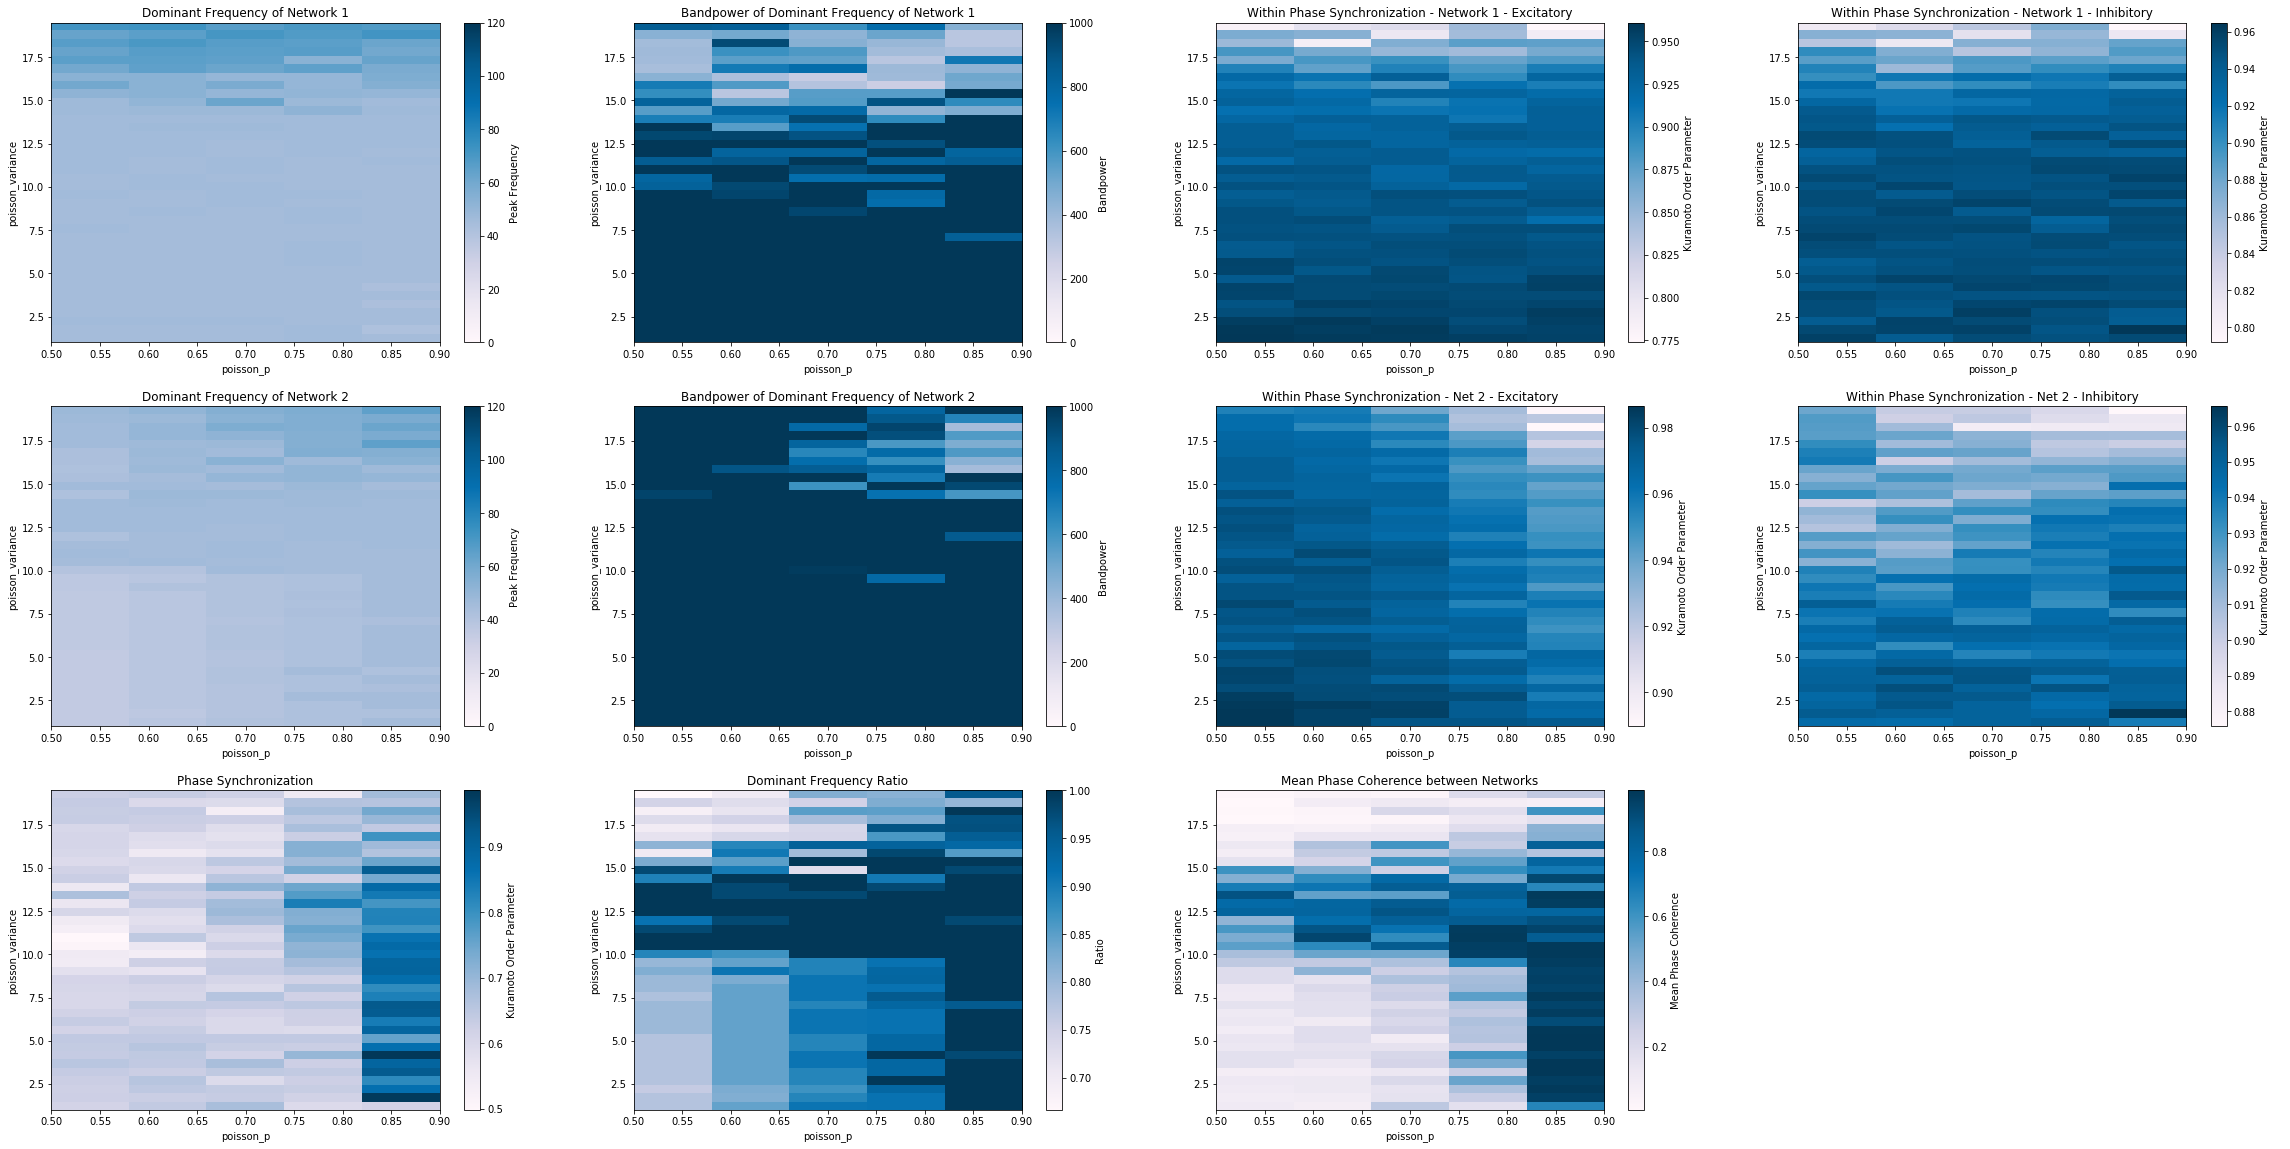

In [16]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None , vmax_phase=None)

### Low Ratio and Low Strength -> No Synchronization

{'poisson_p': 0.6, 'poisson_variance': 1.0}

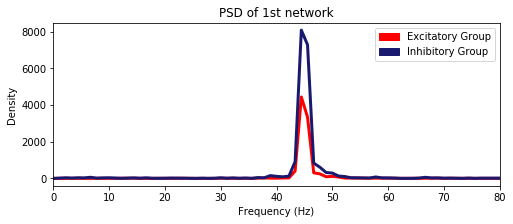

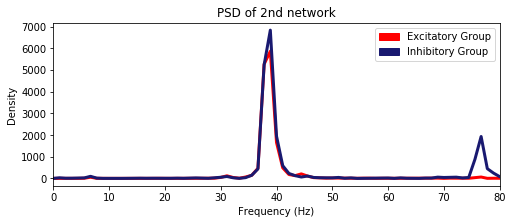

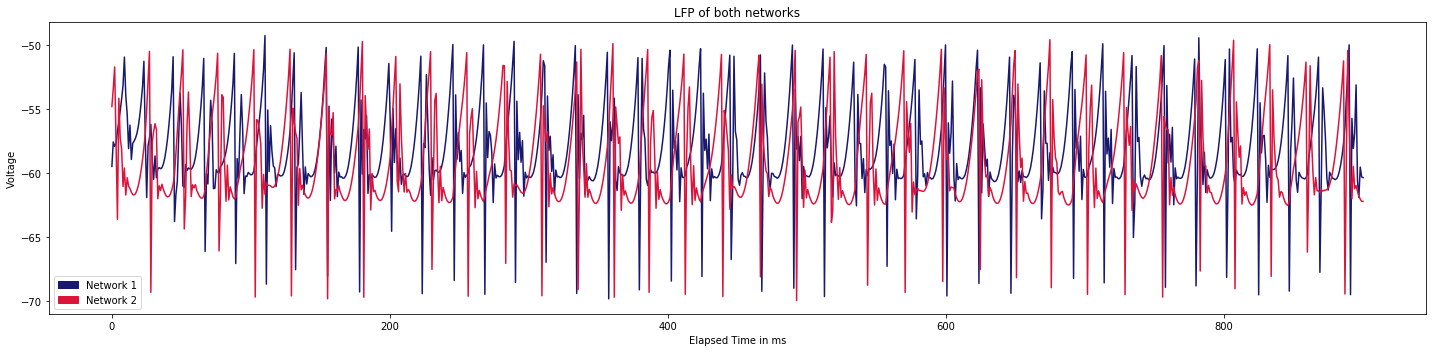

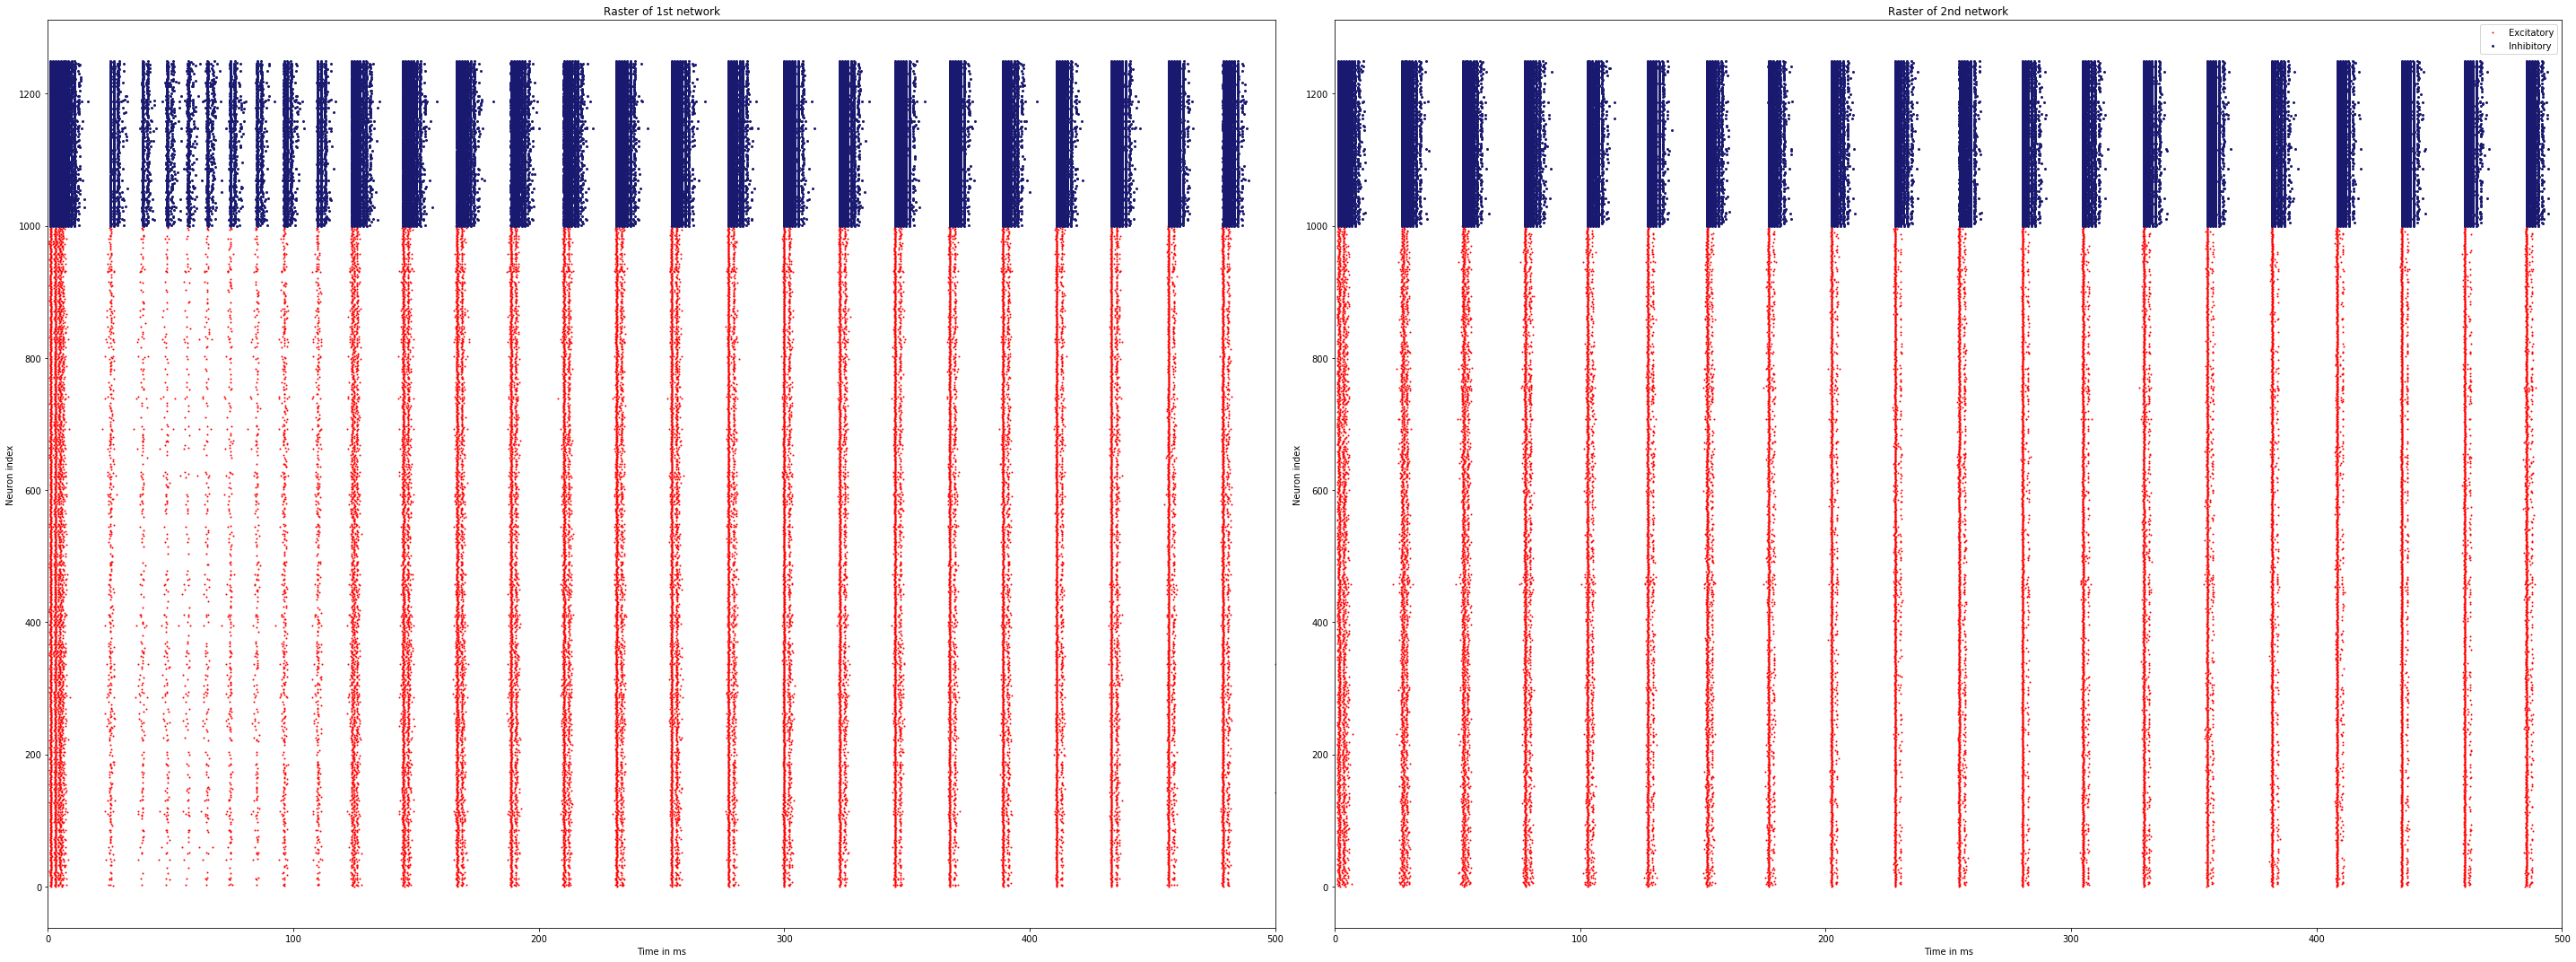

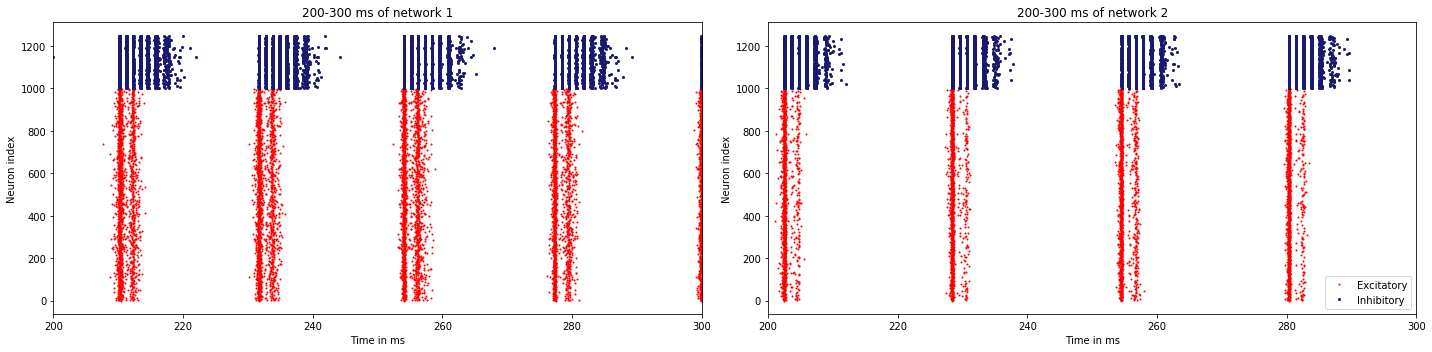

In [11]:
plots.plot_results(ex.get_run(1), xlim_psd=80, full_raster=True, raster_right=500)
ex.params[1]

### Low Ratio and High Strength -> Synchronization

{'poisson_p': 0.6, 'poisson_variance': 13.0}

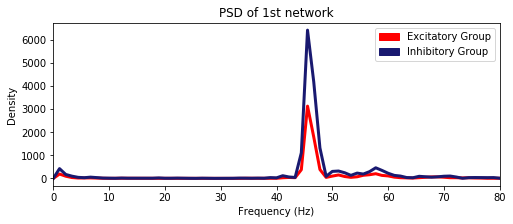

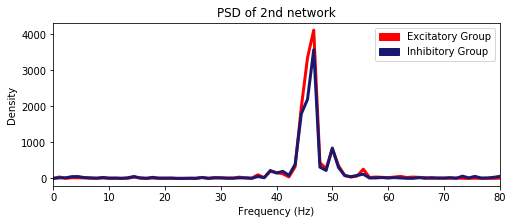

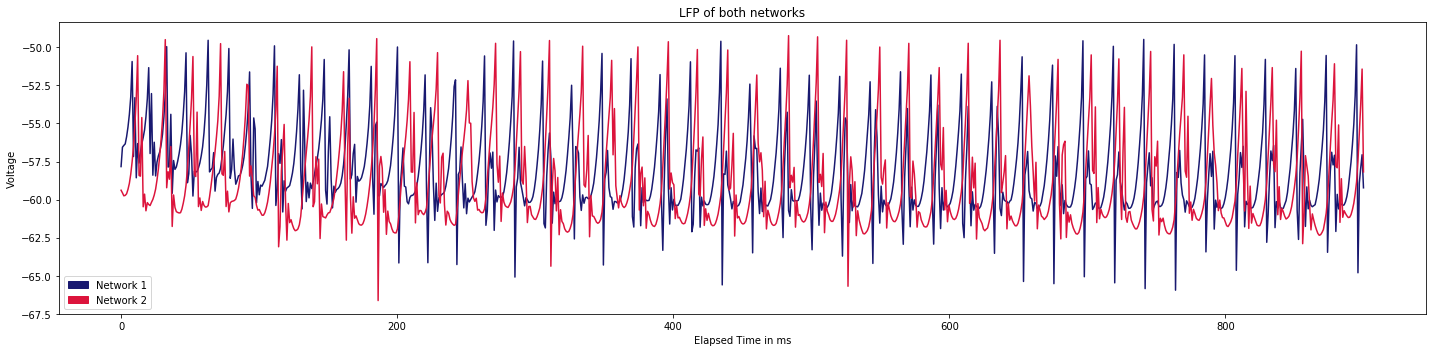

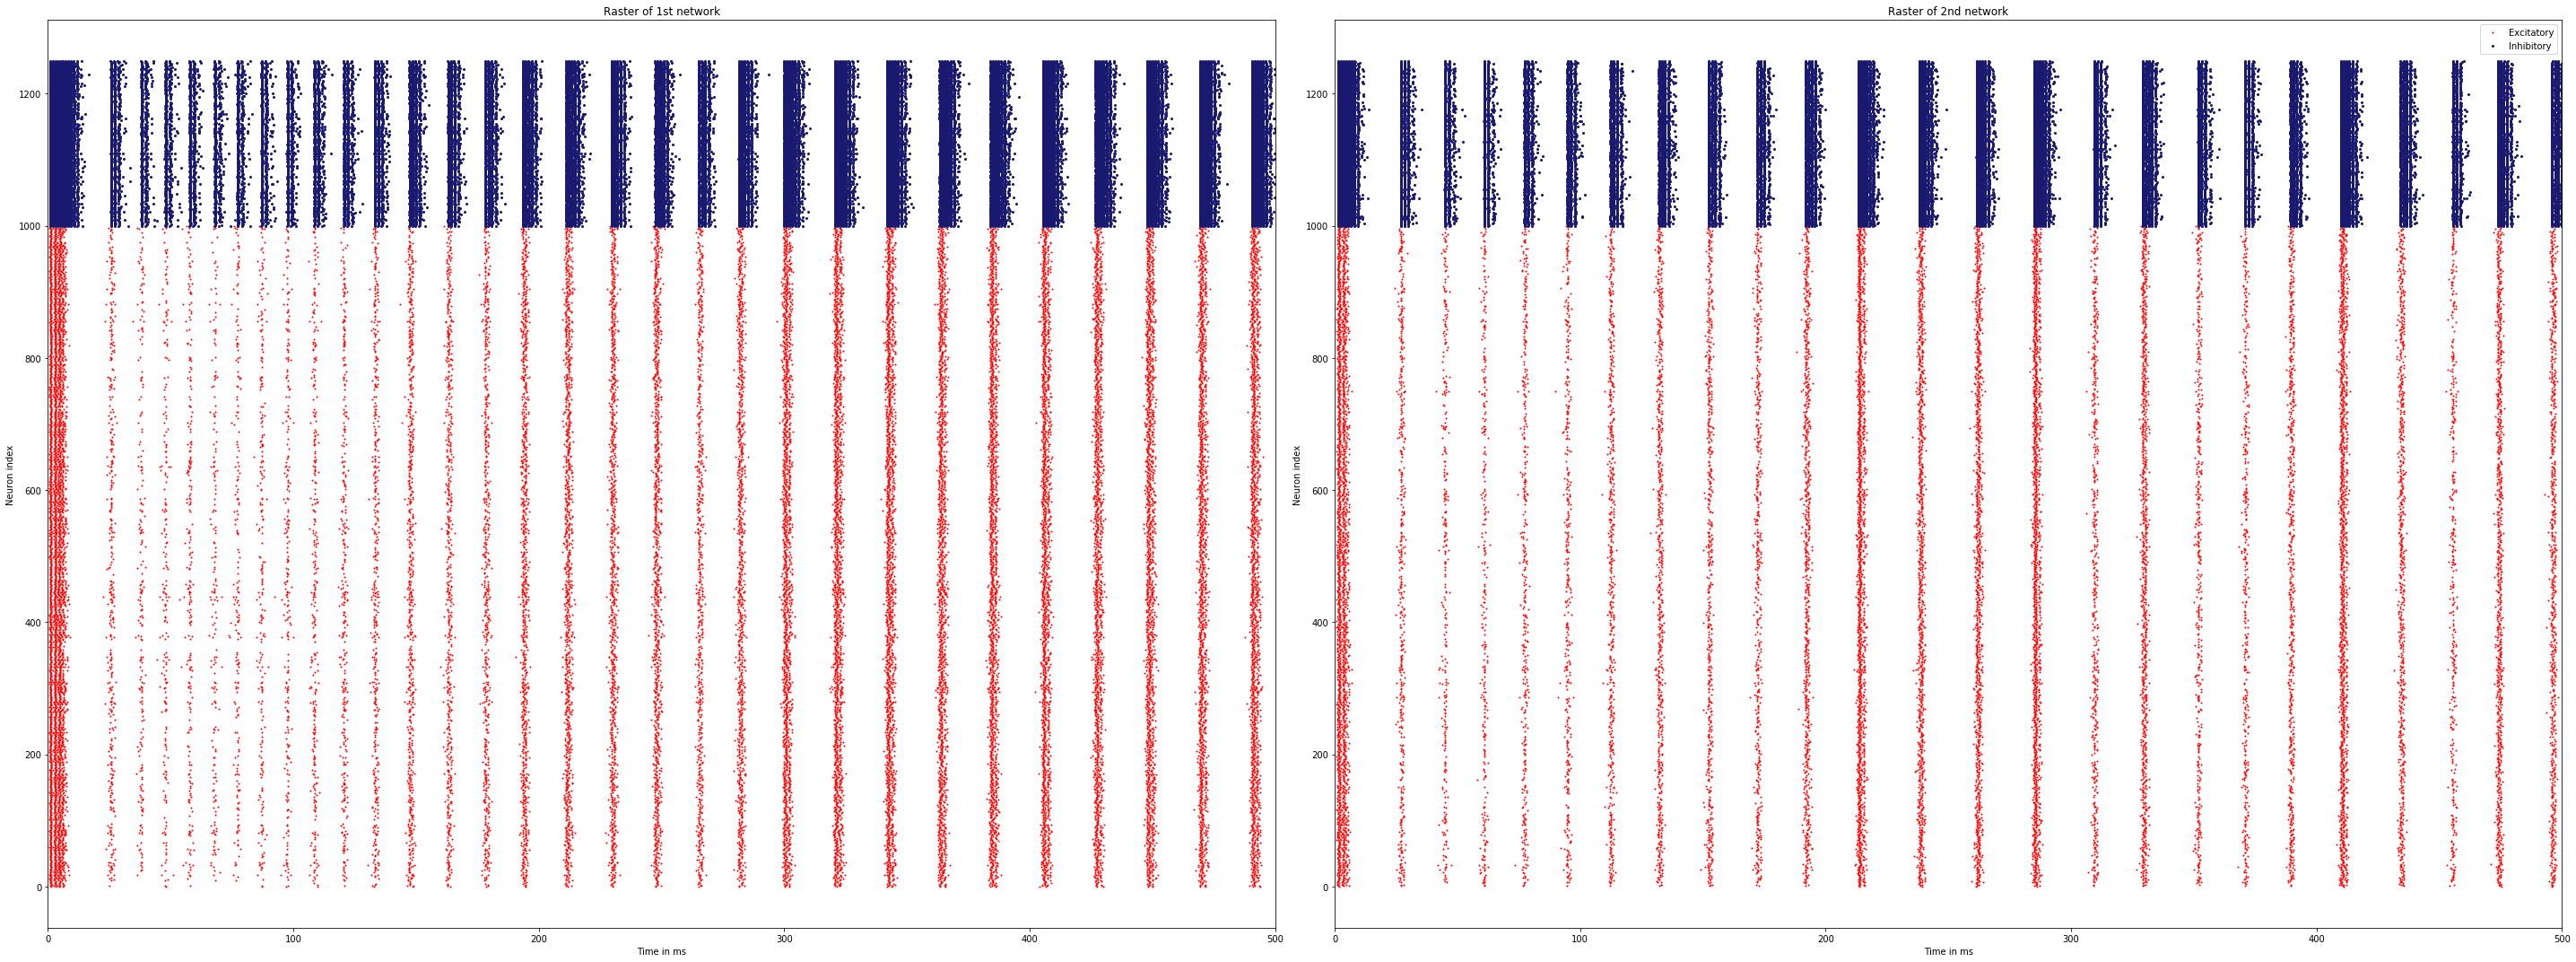

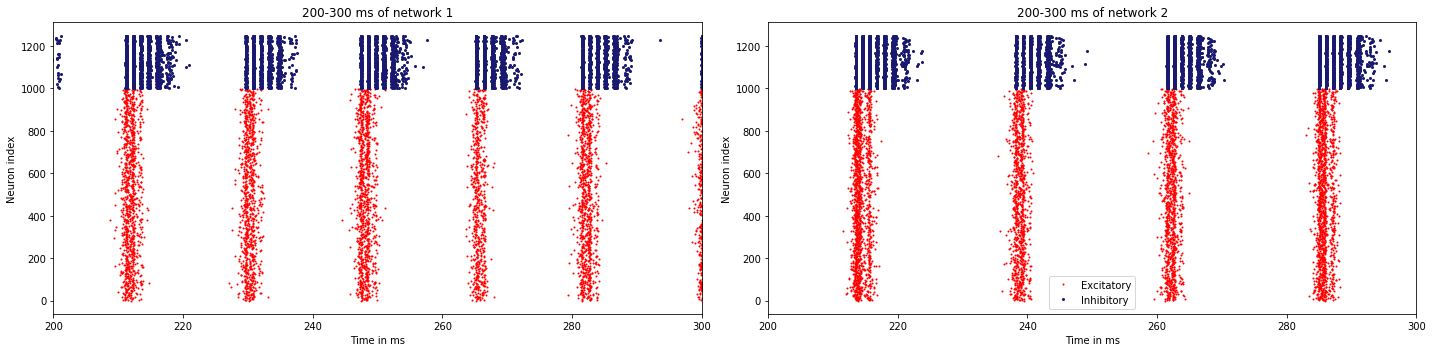

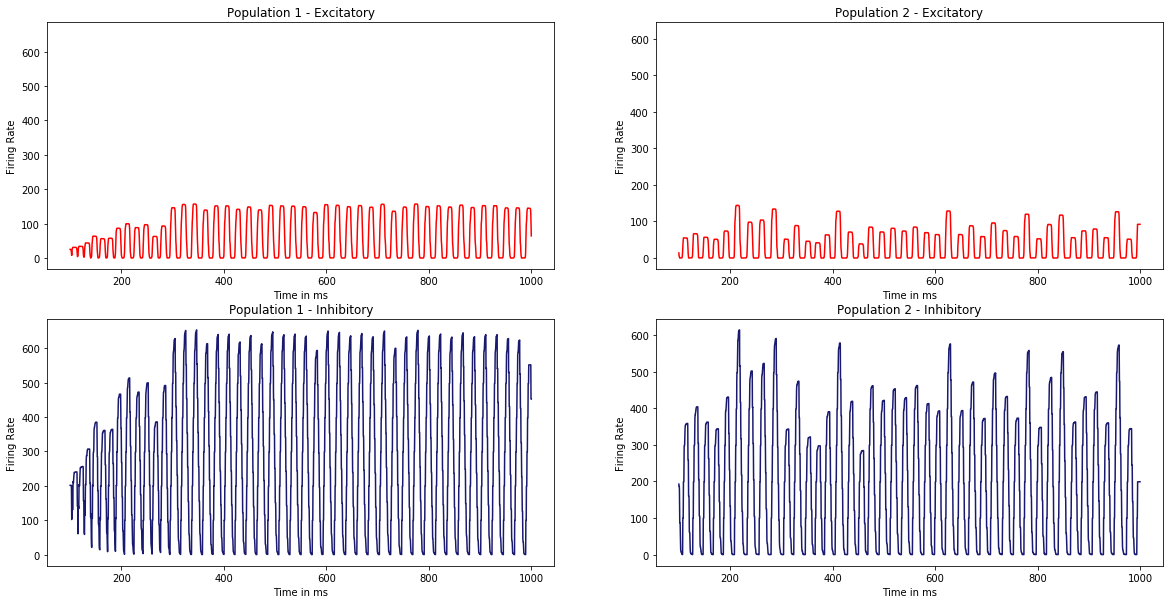

In [14]:
plots.plot_results(ex.get_run(121), xlim_psd=80, full_raster=True, raster_right=500, pop_rates=True)
ex.params[121]

### Highest Noise Strength -> Noisy Frequency Spectrum

{'poisson_p': 0.8999999999999999, 'poisson_variance': 19.5}

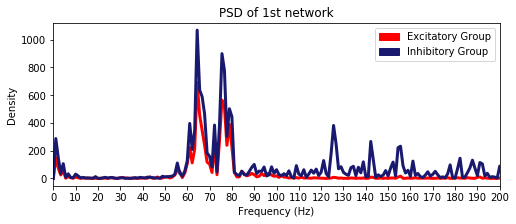

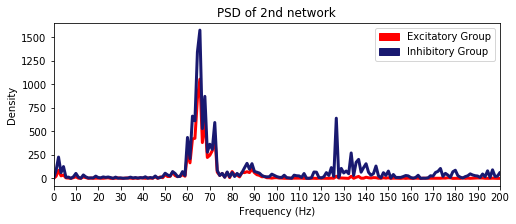

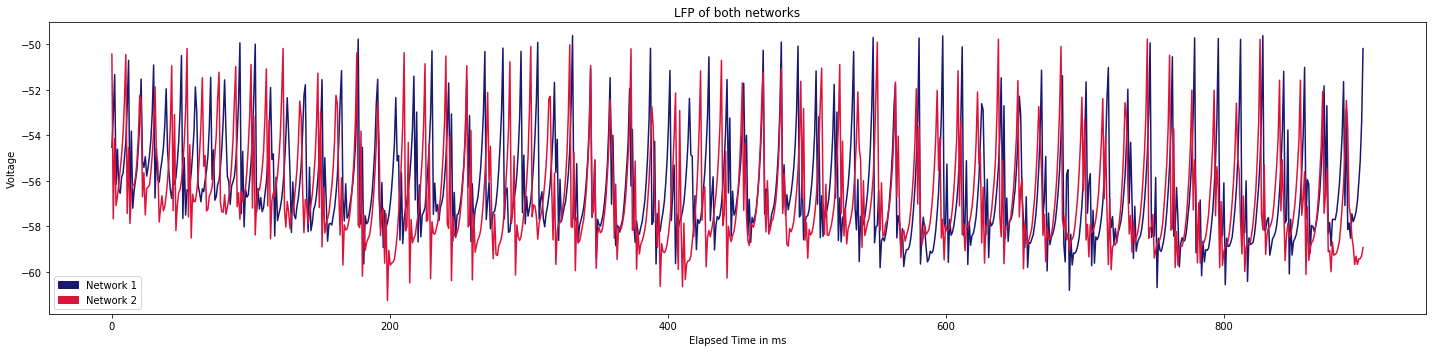

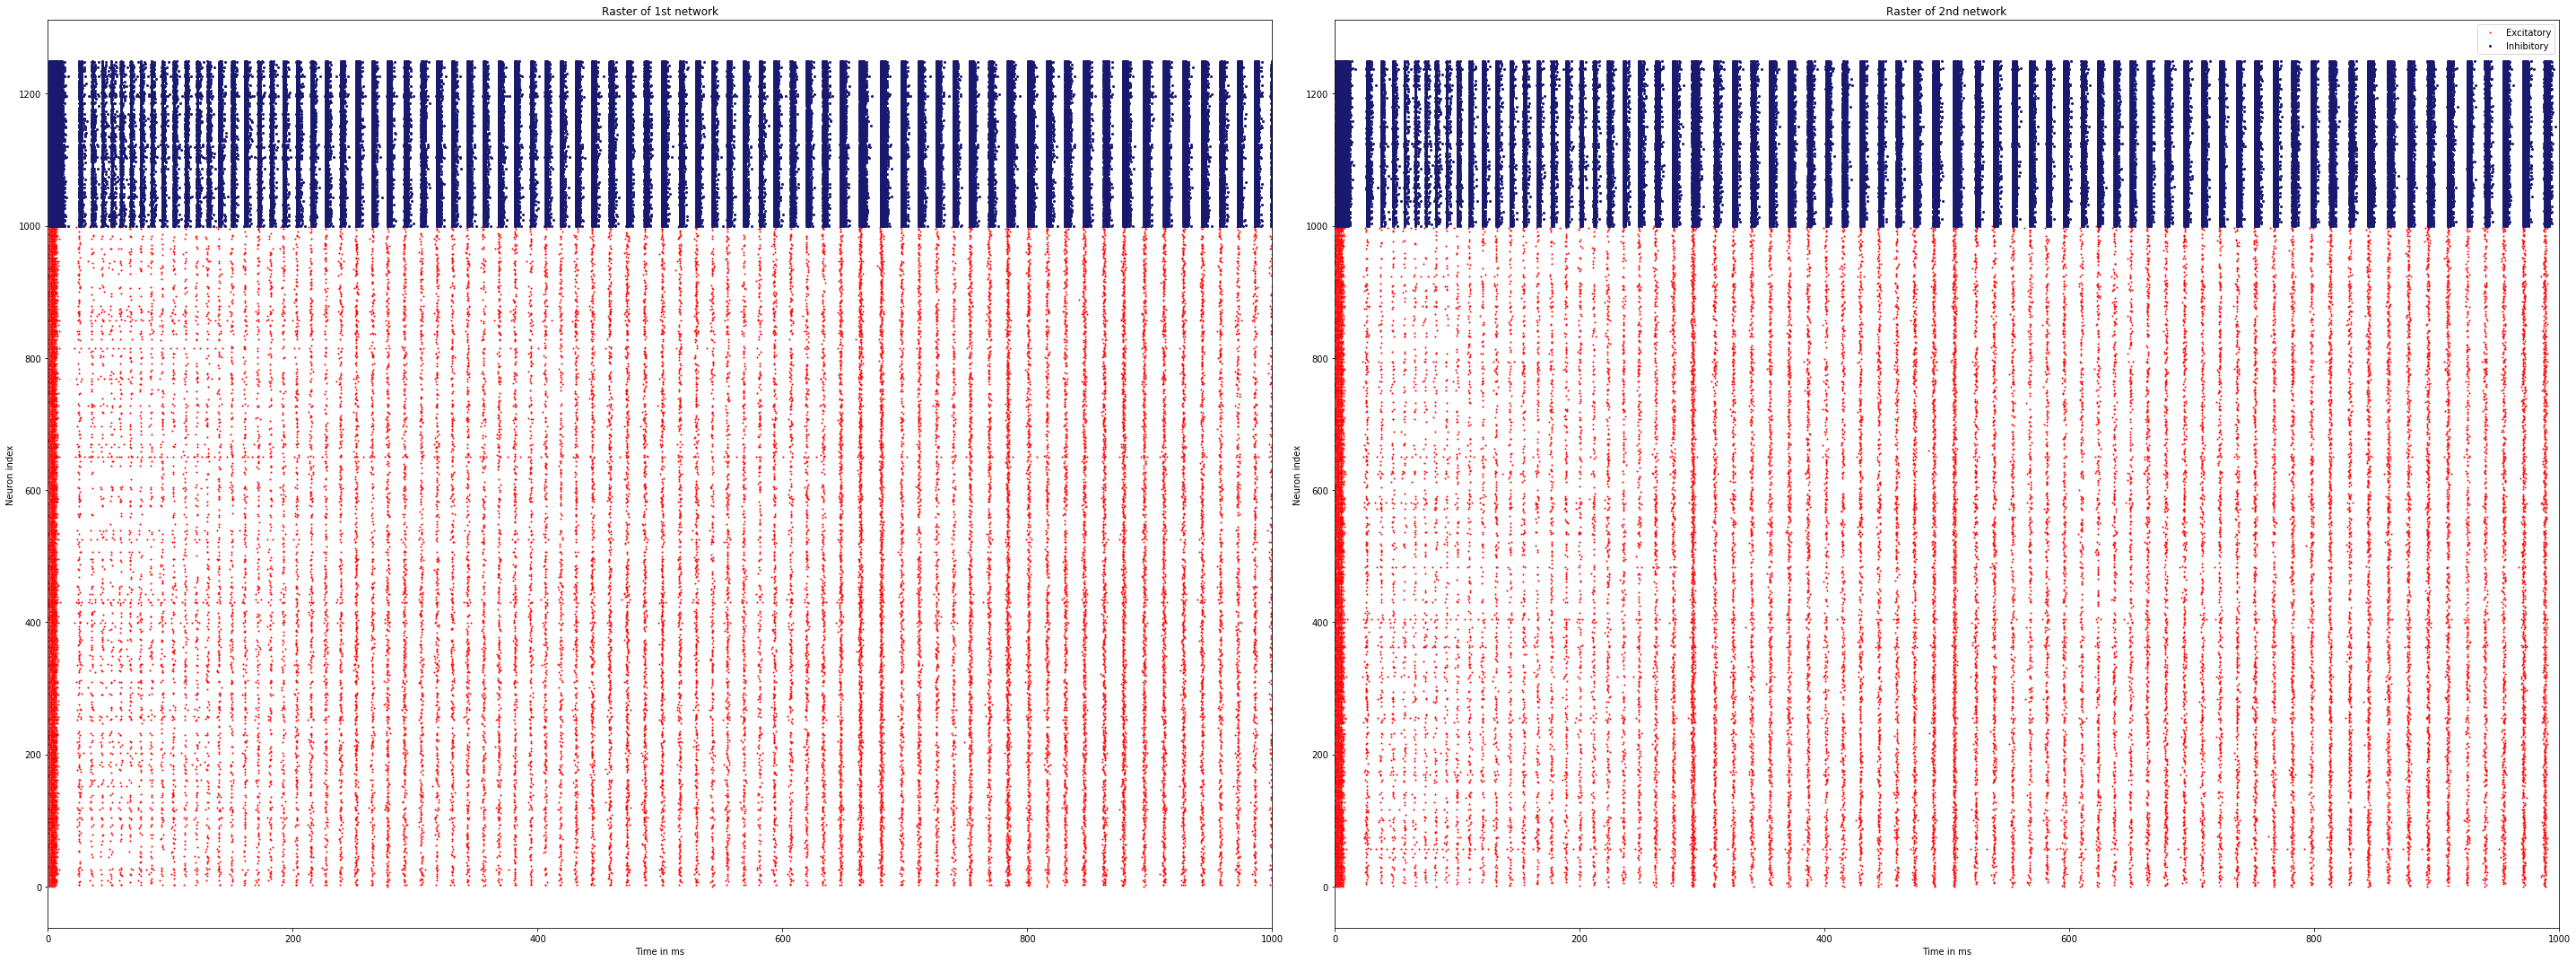

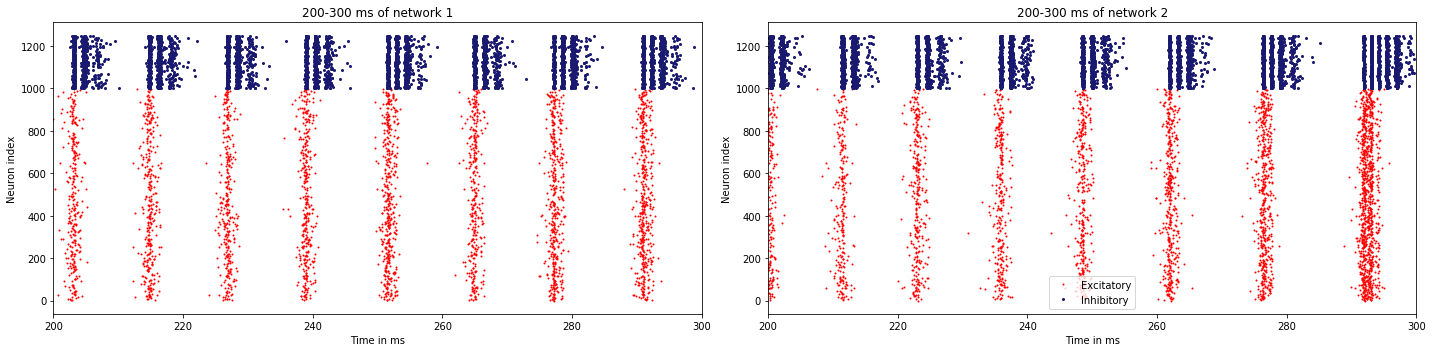

In [13]:
plots.plot_results(ex.get_run(189), xlim_psd=200, full_raster=True, raster_right=1000)
ex.params[189]

## Analysis

### Observations
LFP plot shows that network 2 is lagging behind network 1. Network 1 drives Network 2.

**PING rhythm:** In both networks we see bursts on each cycle. I neurons fire 4-5 times in consecution, E neurons only 2 times. Not yet understoond why this happens. It is likely that $I_E$ is too strong or $J_{ii}$ is too weak. I should try out different values for $J_{ii}$ and see how it changes the firing pattern.

Dominant Frequency of the slower network increases with certain noise strengths and fixed noise ratio. Dom Frequency of faster network is not changed.
Further, this effect only appears if coupling strength is high enough to allow for spiking of E pop in one network to have an effect on E or I population of the other network.


### Questioning the results

**Noise Strength as Amplifier:** However, we see that increase in noise strength still leads to a strong PING rhythm. It could be that noise strength simply amplifies the inter-network interactions. But does it decrease within synchronization? If it does not, that is an imortant difference between our results and Meng & Riecke's results.

Meng reported that increase in noise strength lead to sparseness in firing and that the sparse firing allows the slower network to adapt to the faster network. Is this the case in our example?

So what is still missing is an in depth look at what properties of the network changes when going from unsynchronized state to snychronized state by an increase in the noise strength.


**TODOS for Today:**
* Run main experiment on server with high granularity!
* Limit number of E neurons in raster plot! Or fix performance problems by converting to lower quality png?
* Extract explorations to python file so that they can be run on server